In [1]:
# INPUT: experiment name
study_name = 'homing_cmpt'
var_dict = {'cmpt_type': ['ss'], 'dem_mh_share': [0, 0.5, 1], 'sup_mh_share': [0, 0.5, 1]}  # assumes full enumeration
ref_value = [0, 0]

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
path = os.getcwd()
res_path = path

In [3]:
# Determine scenarios - enumerating based on input
keys, values_lists = zip(*var_dict.items())
scenarios = list(itertools.product(*values_lists))
scenario_names = ['-'.join(f"{key}-{value}" for key, value in zip(keys, scenario)) for scenario in scenarios]
scenario_names = [s.replace('cmpt_type-','') for s in scenario_names]  # drop 'cmpt_type' from scn name

In [4]:
def open_pickle(scn_dict, aggr_scn_path, pkl_name):
    with open(os.path.join(aggr_scn_path, pkl_name), 'rb') as f:
        df = pickle.load(f)
        # print(df)
        for key, value in scn_dict.items():
            df[key] = value
        index_list = [key for key in scn_dict] + ['day']
        df = df.reset_index().set_index(index_list)
    return df

In [5]:
# Loop over scenarios, creating list of df's containing the data, and converting to single df
aggr_dem_list = []
aggr_sup_list = []
# mode_no_rs_list = []
mode_df = pd.DataFrame()
for scn_name in scenario_names:
    # Determine scenario values and save them to dict
    scn_name_split = scn_name.split('-')
    scn_dict = {}
    for i in range(1, len(scn_name_split), 2):
        variable_name = scn_name_split[i]
        variable_value = scn_name_split[i + 1]
        scn_dict[variable_name] = variable_value
    scn_dict['cmpt_type'] = scn_name_split[0]
    # List all folders and find those corresponding to the specific scenario
    aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name) if (float(scn_name_split[2]) != ref_value[0] or float(scn_name_split[4]) != ref_value[1]) else os.path.join(res_path, 'aggr_repl', scn_name.split("-")[0])
    all_items = os.listdir(aggr_scn_path)
    aggr_dem = open_pickle(scn_dict, aggr_scn_path, 'aggr_dem.pkl')
    aggr_sup = open_pickle(scn_dict, aggr_scn_path, 'aggr_sup.pkl')

    with open(os.path.join(aggr_scn_path, 'mode_no_rs.pkl'), 'rb') as f:
        mode_series = pickle.load(f)
        for key, value in scn_dict.items():
            mode_series[key] = value
        mode_df = mode_df.append(mode_series, ignore_index=True)
    aggr_dem_list = aggr_dem_list + [aggr_dem]
    aggr_sup_list = aggr_sup_list + [aggr_sup]
    # mode_no_rs_list = mode_no_rs_list + [df]
aggr_dem = pd.concat(aggr_dem_list)
aggr_sup = pd.concat(aggr_sup_list)
# mode_no_rs = pd.concat(mode_no_rs_list)

In [6]:
# Add scenario label
non_day_level = [level for level in aggr_dem.index.names if level != 'day'] # Find the scenario indices
if len(non_day_level) == 1:
    aggr_dem['label'] = aggr_dem.index.get_level_values(non_day_level[0])
    aggr_sup['label'] = aggr_sup.index.get_level_values(non_day_level[0])
else:
    aggr_dem['label'] = pd.Series(aggr_dem.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index = aggr_dem.index)
    aggr_sup['label'] = pd.Series(aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index = aggr_sup.index)
# mode_df = mode_df.rename(columns={"cmpt_type":"label"}).set_index('label')

In [7]:
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1)
aggr_sup
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1)
# pd.Series(aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index=aggr_sup.index)

pickup_dist   repos_dist  \
dem_mh_share sup_mh_share cmpt_type day                             
0            0            ss        0    3753.069750  3273.626288   
                                    1    3759.445211  2620.912841   
                                    2    4020.151099  2159.619909   
                                    3    4303.758111  1975.460218   
                                    4    4492.177977  2096.477509   
...                                              ...          ...   
1            1            ss        200  7910.154299  7892.361871   
                                    201  8133.116950  7801.826641   
                                    202  8330.283855  8497.720845   
                                    203  7960.202743  8106.043864   
                                    204  8418.015970  7958.200624   

                                             km_occ_1      km_occ_0  informed  \
dem_mh_share sup_mh_share cmpt_type day                                         
0            0            ss        0    13221.210435   7026.696038     623.0   
                                    1    13050.073718   6380.358052     729.0   
                                    2    13421.560508   6179.771009     824.0   
                                    3    14126.583735   6279.218329     905.2   
                                    4    14910.389817   6588.655486     989.2   
...                                               ...           ...       ...   
1            1            ss        200  56106.212784  15802.516170    2500.0   
                                    201  56840.030796  15934.943591    2500.0   
                                    202  57002.840608  16828.004700    2500.0   
                                    203  56810.416967  16066.246607    2500.0   
                                    204  57153.309615  16376.216594    2500.0   

                                         registered_0  registered_1  ptcp_0  \
dem_mh_share sup_mh_share cmpt_type day                                       
0            0            ss        0           113.6         121.2    70.8   
                                    1           108.6         115.8    68.2   
                                    2           106.6         118.2    63.2   
                                    3           110.8         121.4    60.6   
                                    4           111.4         123.6    65.8   
...                                               ...           ...     ...   
1            1            ss        200         607.0         607.0   488.0   
                                    201         605.0         605.0   490.0   
                                    202         606.0         606.0   490.0   
                                    203         606.0         606.0   489.0   
                                    204         605.0         605.0   488.0   

                                         ptcp_1     exp_inc  ...  \
dem_mh_share sup_mh_share cmpt_type day                      ...   
0            0            ss        0      81.2   81.172750  ...   
                                    1      73.6   86.970666  ...   
                                    2      65.4   99.494055  ...   
                                    3      65.6  107.146950  ...   
                                    4      67.8  106.746483  ...   
...                                         ...         ...  ...   
1            1            ss        200   488.0  114.691332  ...   
                                    201   490.0  115.729418  ...   
                                    202   490.0  115.600980  ...   
                                    203   489.0  115.891682  ...   
                                    204   488.0  116.734457  ...   

                                         perc_inc_sh_1  perc_inc_reg_0  \
dem_mh_share sup_mh_share cmpt_type day                                  
0            0            ss

In [8]:
aggr_dem

informed  requests_0  requests_1  \
dem_mh_share sup_mh_share cmpt_type day                                     
0            0            ss        0      8371.0      1129.8      1112.2   
                                    1     10382.2      1100.8      1138.4   
                                    2     12280.8      1120.0      1186.0   
                                    3     14100.2      1185.4      1236.8   
                                    4     15826.0      1220.2      1334.0   
...                                           ...         ...         ...   
1            1            ss        200   30924.0      9656.0      9656.0   
                                    201   30924.0      9772.0      9772.0   
                                    202   30924.0      9790.0      9790.0   
                                    203   30924.0      9794.0      9794.0   
                                    204   30924.0      9857.0      9857.0   

                                         gets_offer_0  gets_offer_1  \
dem_mh_share sup_mh_share cmpt_type day                               
0            0            ss        0          1127.6        1110.6   
                                    1          1097.0        1135.0   
                                    2          1116.4        1181.6   
                                    3          1178.6        1232.2   
                                    4          1217.2        1330.2   
...                                               ...           ...   
1            1            ss        200        9656.0        9656.0   
                                    201        9771.0        9771.0   
                                    202        9787.0        9786.0   
                                    203        9791.0        9791.0   
                                    204        9856.0        9856.0   

                                         accepts_offer_0  accepts_offer_1  \
dem_mh_share sup_mh_share cmpt_type day                                     
0            0            ss        0             1127.6           1110.6   
                                    1             1097.0           1135.0   
                                    2             1116.4           1181.6   
                                    3             1178.6           1232.2   
                                    4             1217.2           1330.2   
...                                                  ...              ...   
1            1            ss        200           4812.0           4844.0   
                                    201           4938.0           4833.0   
                                    202           4868.0           4919.0   
                                    203           4805.0           4986.0   
                                    204           4897.0           4959.0   

                                         registered_0  registered_1      car  \
dem_mh_share sup_mh_share cmpt_type day                                        
0            0            ss        0          3162.6        3325.2  10344.4   
                                    1          3404.6        3656.6  10372.6   
                                    2          3822.2        4026.4  10364.0   
                                    3          4183.4        4596.4  10305.0   
                                    4          4735.4        5083.8  10230.0   
...                                               ...           ...      ...   
1            1            ss        200       30924.0       30924.0   7086.0   
                                    201       30924.0       30924.0   6960.0   
                                    202       30924.0       30924.0   7015.0   
                                    203       30924.0       30924.0   6983.0   
                                    204       30924.0       30924.0   6985.0   

                                         ...  perc_detour_mh  \
dem_mh_s

In [9]:
# Create df with market (system) level indicators
aggr_dem_reset = aggr_dem.reset_index()
aggr_sup_reset = aggr_sup.reset_index()
market_df = aggr_dem_reset.copy()[['day','label']]
market_df['tot_regist_dem'] = aggr_dem_reset.registered_mh + aggr_dem_reset.registered_sh_0 + aggr_dem_reset.registered_sh_1.fillna(0)
market_df['market_share'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / 100000
# market_df['exp_wait'] = aggr_dem_reset.corr_xp_wait
# market_df['exp_ivt'] = aggr_dem_reset.xp_ivt
market_df['tot_regist_sup'] = aggr_sup_reset.registered_mh + aggr_sup_reset.registered_sh_0 + aggr_sup_reset.registered_sh_1.fillna(0)
market_df['tot_ptcp'] = aggr_sup_reset.ptcp_mh + aggr_sup_reset.ptcp_sh_0 + aggr_sup_reset.ptcp_sh_1.fillna(0)
market_df['exp_inc'] = aggr_sup_reset.exp_inc
# market_df['perc_inc_reg_mh'] = aggr_sup_reset.perc_inc_reg_mh
# market_df['perc_inc_notreg_mh'] = aggr_sup_reset.perc_inc_notreg_mh
market_df['rel_pickup_dist'] = aggr_sup_reset.pickup_dist / market_df.market_share / 100000
market_df['rel_repos_dist'] = aggr_sup_reset.repos_dist / market_df.market_share / 100000
if 'km_occ_2' in aggr_sup_reset.columns:
    km_occ_2 = aggr_sup_reset.km_occ_2.fillna(0)
else:
    km_occ_2 = 0
if 'km_occ_3' in aggr_sup_reset.columns:
    km_occ_3 = aggr_sup_reset.km_occ_3.fillna(0)
else:
    km_occ_3 = 0
if 'km_occ_4' in aggr_sup_reset.columns:
    km_occ_4 = aggr_sup_reset.km_occ_4.fillna(0)
else:
    km_occ_4 = 0
if 'km_occ_5' in aggr_sup_reset.columns:
    km_occ_5 = aggr_sup_reset.km_occ_5.fillna(0)
else:
    km_occ_5 = 0
if 'km_occ_6' in aggr_sup_reset.columns:
    km_occ_6 = aggr_sup_reset.km_occ_6.fillna(0)
else:
    km_occ_6 = 0
market_df['rel_serving_dist'] = (aggr_sup_reset.km_occ_1.fillna(0) + km_occ_2 + km_occ_3 + km_occ_4 + km_occ_5 + km_occ_6) / market_df.market_share / 100000
market_df['driver_per_req'] = market_df.tot_ptcp / market_df.market_share / 100000
market_df['service_rate'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / (aggr_dem_reset.requests_mh + aggr_dem_reset.requests_sh_0 + aggr_dem_reset.requests_sh_1.fillna(0))
market_df['service_rate_0'] = aggr_dem_reset.gets_offer_0 / aggr_dem_reset.requests_0
market_df['service_rate_1'] = aggr_dem_reset.gets_offer_1 / aggr_dem_reset.requests_1

In [10]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = market_df.columns.drop(['label', 'day'])

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # Iterate over unique labels and plot the data for each label
#     for label in unique_labels:
#         label_data = market_df[market_df['label'] == label]
#         ax.plot(label_data['day'], label_data[col], label=label)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Select-indicators.png', facecolor='w')
# # plt.show()

In [11]:
conv_steady_days = 10
moving_average_days = 75
eql_dem = aggr_dem.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()
eql_sup = aggr_sup.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()

In [12]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = eql_dem.columns

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # # Iterate over unique labels and plot the data for each label
#     # for label in unique_labels:
#     #     label_data = eql_dem[eql_dem.index == label]
#     ax.bar(height=eql_dem[col], x=eql_dem.index.values)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Eql-select-indicators.png', facecolor='w')

In [13]:
# aggr_sup.groupby(['label']).tail(conv_steady_days + moving_average_days).reset_index()

In [14]:
# # plot data in stack manner of bar type
# eql_dem['rs'] = eql_dem.accepts_offer_0 + eql_dem.accepts_offer_1.fillna(0)

# # Create the stacked bar chart
# ax = (eql_dem[['rs','bike','car','pt']] / 100000 * 100).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Modal share under different ridesourcing service types')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# # Show the plot
# plt.ylabel('Modal share (%)')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()

In [15]:
eql_dem['former_bike'] = mode_df.no_rs_bike - eql_dem.bike
eql_dem['former_car'] = mode_df.no_rs_car - eql_dem.car
eql_dem['former_pt'] = mode_df.no_rs_pt - eql_dem.pt


In [16]:
# # Create the stacked bar chart
# ax = (eql_dem[['former_bike','former_car','former_pt']]).div((eql_dem['requests_0'] + eql_dem['requests_1'].fillna(0)) / 100, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Modal share under different ridesourcing service types')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# # Show the plot
# plt.ylabel('Modal share (%)')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()

# # waarom 50 procent bij requests_sh_0, requests_sh_1 en requests_mh, gaat iets fout? heeft iets met singlehoming en multihoming te maken? bars zijn ook niet helemaal gelijk?
# # dit plaatje met accepts_offer kan meer zijn dan 1 omdat er ook requests worden afggewezen?
# # Note: requests is niet goed als er multi-homers zijn. Bars zijn ook niet allemaal gelijk?

In [17]:
eql_dem

,informed,requests_0,requests_1,gets_offer_0,gets_offer_1,accepts_offer_0,accepts_offer_1,registered_0,registered_1,car,...,perc_detour_sh_1,perc_km_fare_mh,perc_km_fare_sh_0,perc_km_fare_sh_1,eff_pax_dist_0,eff_pax_dist_1,requests_sh_largest,former_bike,former_car,former_pt
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,30996.247059,8621.300000,5788.100000,8620.129412,5785.547059,6836.829412,2733.341176,27442.729412,18957.588235,7080.117647,...,-1.269175e-07,1.5,1.500000,1.500000,4.031734e+07,1.566113e+07,3783.664706,NaN,NaN,NaN
0.5_0_ss,30970.070588,6175.211765,8068.029412,6166.217647,8064.641176,3138.041176,6297.558824,20142.335294,26235.041176,7129.852941,...,4.013386e-07,1.5,1.500000,1.500000,1.826446e+07,3.685670e+07,4338.870588,NaN,NaN,NaN
0.5_1_ss,31026.611765,7384.223529,7086.570588,7383.217647,7085.541176,4961.452941,4672.735294,23655.417647,22771.511765,7067.723529,...,-5.134121e-07,1.5,1.500000,1.499999,2.917599e+07,2.729162e+07,2549.000000,NaN,NaN,NaN
0_0.5_ss,31003.576471,1909.176471,7581.917647,1907.982353,7580.958824,1907.976471,7580.958824,7012.123529,23991.452941,7120.288235,...,3.414396e-07,NaN,1.500000,1.500000,1.054551e+07,4.502337e+07,7581.917647,NaN,NaN,NaN
0_0_ss,30937.114706,5649.365686,3632.955490,5647.935686,3631.817255,5647.935686,3631.817255,18860.958627,12075.678235,7173.780980,...,8.016978e-08,NaN,1.500000,1.500000,3.310544e+07,2.131028e+07,NaN,NaN,NaN,NaN
0_1_ss,31010.905882,4760.723529,4823.741176,4759.723529,4822.841176,4759.711765,4822.823529,15464.723529,15546.182353,7080.923529,...,-2.085918e-07,NaN,1.499999,1.499999,2.781009e+07,2.832497e+07,4836.741176,NaN,NaN,NaN
1_0.5_ss,30924.000000,9717.529412,9717.529412,9715.094118,9715.211765,4848.435294,4867.870588,30924.000000,30924.000000,6985.588235,...,NaN,1.5,NaN,NaN,2.826897e+07,2.835183e+07,0.000000,NaN,NaN,NaN
1_0_ss,31068.494118,9741.264706,9741.264706,9736.758824,9736.841176,4877.794118,4862.241176,31068.494118,31068.494118,7033.858824,...,NaN,1.5,NaN,NaN,2.866249e+07,2.858764e+07,0.000000,NaN,NaN,NaN
1_1_ss,30991.011765,9728.111765,9728.111765,9726.500000,9726.558824,4874.605882,4852.147059,30991.011765,30991.011765,7016.147059,...,NaN,1.5,NaN,NaN,2.850932e+07,2.835796e+07,0.000000,NaN,NaN,NaN


In [18]:
# # Create the stacked bar chart
# ax = (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Veh km per pax km')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# # Show the plot
# plt.ylabel('Veh km per pax km')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()


In [19]:
eql_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_sh_0,perc_inc_sh_1,perc_inc_reg_0,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1,ptcp_sh_largest
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8285.097473,8089.221681,55978.465125,16374.319154,2500.0,585.776471,371.505882,464.717647,301.223529,115.181108,...,109.025179,99.463627,109.114190,119.728545,119.855951,99.911432,71.958860,76.732510,65.406403,181.676471
0.5_0_ss,8443.542762,8202.311310,55121.156010,16645.854072,2500.0,196.847059,407.676471,161.317647,321.070588,113.299236,...,108.664849,112.216634,109.178062,NaN,NaN,112.666127,71.667004,NaN,73.351721,409.970588
0.5_1_ss,8093.058652,8195.821008,56467.615289,16288.879660,2500.0,609.064706,609.064706,487.094118,487.094118,115.258806,...,NaN,NaN,NaN,115.039189,115.184568,NaN,NaN,74.058247,NaN,0.000000
0_0.5_ss,8332.541097,8093.154526,55568.883311,16425.695622,2500.0,358.964706,599.476471,293.970588,481.741176,114.414774,...,76.059476,104.775752,38.721602,120.242779,120.360849,104.664828,32.227327,77.175527,67.676480,188.117647
0_0_ss,7946.191176,7983.686667,54415.722805,15929.877843,2500.0,353.724314,232.194706,286.345882,185.831176,114.464674,...,89.147392,72.080943,77.462399,NaN,NaN,45.202477,51.744942,NaN,30.026004,NaN
0_1_ss,7996.357176,8403.146375,56135.056221,16399.503552,2500.0,603.770588,603.770588,491.370588,491.370588,113.489442,...,NaN,NaN,NaN,113.226482,113.420763,NaN,NaN,72.950718,NaN,0.000000
1_0.5_ss,8169.086967,8306.201270,56620.791128,16475.288237,2500.0,453.611765,453.647059,366.129412,368.541176,114.446528,...,111.491592,111.575875,112.260978,116.768132,116.992971,112.267191,72.911734,72.445175,73.456858,135.329412
1_0_ss,8230.037892,8401.341433,57250.122078,16631.379325,2500.0,308.494118,313.217647,248.447059,247.929412,114.547102,...,114.323327,114.247815,115.157179,NaN,NaN,115.156865,74.626243,NaN,76.086753,253.805882
1_1_ss,8128.075325,8169.723132,56867.284303,16297.798457,2500.0,612.229412,612.229412,488.970588,488.970588,115.740705,...,NaN,NaN,NaN,115.452536,115.697091,NaN,NaN,73.987318,NaN,0.000000


In [20]:
# # Create subplots within a single figure
# n_rows = 3
# n_cols = 4
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

# eql_dem['service_rate_sh_0'] = eql_dem['gets_offer_sh_0'] / eql_dem['requests_sh_0']
# eql_dem['service_rate_sh_1'] = eql_dem['gets_offer_sh_1'] / eql_dem['requests_sh_1']

# indicators = ['requests_sh','service_rate_sh', 'exp_wait_sh', 'exp_detour_sh', 'registered_sh', 'ptcp_sh', 'exp_inc_sh']
# stacked = [True, False, False, False, True, True, False]
# type = ['dem', 'dem', 'dem', 'dem', 'sup', 'sup', 'sup']

# i = 0
# for j, indicator in enumerate(indicators):
    
#     k = j - i*n_cols
#         # ax.bar(height=eql_dem[indicators[j]], x=eql_dem.index.values)
    
#     if type[j] == 'dem':
#         if stacked[j]:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
#     else:
#         if stacked[j]:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(indicators[j])
#     ax.set_title(f'Column: {indicators[j]}')
#     ax.legend()

#     if j == n_cols-1:
#         i+=1


# # axes[0,0].set_ylim(0,35000)
# # axes[0,1].set_ylim(0,10000)

# (eql_dem[['former_bike','former_car','former_pt']] / 100000 * 100).plot(kind='bar', stacked=True, ax=axes[1,3], width=0.8)
# # Label bars with their values
# for container in axes[1,3].containers:
#     axes[1, 3].bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# axes[1,3].set_ylim(0,10)

# (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Veh km per pax km', ax = axes[2,0])

# plt.tight_layout()
# plt.savefig('Eql-dem-indicators.png', facecolor='w')

In [21]:
aggr_dem.keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'gets_offer_mh_0', 'gets_offer_mh_1',
       'gets_offer_sh_0', 'gets_offer_sh_1', 'accepts_offer_mh_0',
       'accepts_offer_mh_1', 'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1',
       'exp_detour_mh', 'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_far

In [22]:
eql_sup
# eql_sup[var_dict.keys[1]] = 0
eql_sup
var_dict

{'cmpt_type': ['ss'], 'dem_mh_share': [0, 0.5, 1], 'sup_mh_share': [0, 0.5, 1]}

In [23]:
eql_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_sh_0,perc_inc_sh_1,perc_inc_reg_0,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1,ptcp_sh_largest
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8285.097473,8089.221681,55978.465125,16374.319154,2500.0,585.776471,371.505882,464.717647,301.223529,115.181108,...,109.025179,99.463627,109.114190,119.728545,119.855951,99.911432,71.958860,76.732510,65.406403,181.676471
0.5_0_ss,8443.542762,8202.311310,55121.156010,16645.854072,2500.0,196.847059,407.676471,161.317647,321.070588,113.299236,...,108.664849,112.216634,109.178062,NaN,NaN,112.666127,71.667004,NaN,73.351721,409.970588
0.5_1_ss,8093.058652,8195.821008,56467.615289,16288.879660,2500.0,609.064706,609.064706,487.094118,487.094118,115.258806,...,NaN,NaN,NaN,115.039189,115.184568,NaN,NaN,74.058247,NaN,0.000000
0_0.5_ss,8332.541097,8093.154526,55568.883311,16425.695622,2500.0,358.964706,599.476471,293.970588,481.741176,114.414774,...,76.059476,104.775752,38.721602,120.242779,120.360849,104.664828,32.227327,77.175527,67.676480,188.117647
0_0_ss,7946.191176,7983.686667,54415.722805,15929.877843,2500.0,353.724314,232.194706,286.345882,185.831176,114.464674,...,89.147392,72.080943,77.462399,NaN,NaN,45.202477,51.744942,NaN,30.026004,NaN
0_1_ss,7996.357176,8403.146375,56135.056221,16399.503552,2500.0,603.770588,603.770588,491.370588,491.370588,113.489442,...,NaN,NaN,NaN,113.226482,113.420763,NaN,NaN,72.950718,NaN,0.000000
1_0.5_ss,8169.086967,8306.201270,56620.791128,16475.288237,2500.0,453.611765,453.647059,366.129412,368.541176,114.446528,...,111.491592,111.575875,112.260978,116.768132,116.992971,112.267191,72.911734,72.445175,73.456858,135.329412
1_0_ss,8230.037892,8401.341433,57250.122078,16631.379325,2500.0,308.494118,313.217647,248.447059,247.929412,114.547102,...,114.323327,114.247815,115.157179,NaN,NaN,115.156865,74.626243,NaN,76.086753,253.805882
1_1_ss,8128.075325,8169.723132,56867.284303,16297.798457,2500.0,612.229412,612.229412,488.970588,488.970588,115.740705,...,NaN,NaN,NaN,115.452536,115.697091,NaN,NaN,73.987318,NaN,0.000000


In [24]:
# Define a function to split the index and return a Series
def split_index(row):
    return pd.Series(row.name.split('_'))

# Apply the function to the DataFrame
new_columns = eql_sup.apply(split_index, axis=1)
new_columns.columns = ['dem_mh_share', 'sup_mh_share', 'cmpt_type']

# Concatenate the new columns with the original DataFrame
df_sup = pd.concat([eql_sup, new_columns], axis=1)
df_dem = pd.concat([eql_dem, new_columns], axis=1)

In [25]:
df_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1,ptcp_sh_largest,dem_mh_share,sup_mh_share,cmpt_type
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8285.097473,8089.221681,55978.465125,16374.319154,2500.0,585.776471,371.505882,464.717647,301.223529,115.181108,...,119.728545,119.855951,99.911432,71.958860,76.732510,65.406403,181.676471,0.5,0.5,ss
0.5_0_ss,8443.542762,8202.311310,55121.156010,16645.854072,2500.0,196.847059,407.676471,161.317647,321.070588,113.299236,...,NaN,NaN,112.666127,71.667004,NaN,73.351721,409.970588,0.5,0,ss
0.5_1_ss,8093.058652,8195.821008,56467.615289,16288.879660,2500.0,609.064706,609.064706,487.094118,487.094118,115.258806,...,115.039189,115.184568,NaN,NaN,74.058247,NaN,0.000000,0.5,1,ss
0_0.5_ss,8332.541097,8093.154526,55568.883311,16425.695622,2500.0,358.964706,599.476471,293.970588,481.741176,114.414774,...,120.242779,120.360849,104.664828,32.227327,77.175527,67.676480,188.117647,0,0.5,ss
0_0_ss,7946.191176,7983.686667,54415.722805,15929.877843,2500.0,353.724314,232.194706,286.345882,185.831176,114.464674,...,NaN,NaN,45.202477,51.744942,NaN,30.026004,NaN,0,0,ss
0_1_ss,7996.357176,8403.146375,56135.056221,16399.503552,2500.0,603.770588,603.770588,491.370588,491.370588,113.489442,...,113.226482,113.420763,NaN,NaN,72.950718,NaN,0.000000,0,1,ss
1_0.5_ss,8169.086967,8306.201270,56620.791128,16475.288237,2500.0,453.611765,453.647059,366.129412,368.541176,114.446528,...,116.768132,116.992971,112.267191,72.911734,72.445175,73.456858,135.329412,1,0.5,ss
1_0_ss,8230.037892,8401.341433,57250.122078,16631.379325,2500.0,308.494118,313.217647,248.447059,247.929412,114.547102,...,NaN,NaN,115.156865,74.626243,NaN,76.086753,253.805882,1,0,ss
1_1_ss,8128.075325,8169.723132,56867.284303,16297.798457,2500.0,612.229412,612.229412,488.970588,488.970588,115.740705,...,115.452536,115.697091,NaN,NaN,73.987318,NaN,0.000000,1,1,ss


In [26]:
# df_sup['ptcp_tot'] = df_sup['ptcp_0'] + df_sup['ptcp_1']
# df_sup

In [27]:
# import seaborn as sns

# Get column names as a list
column_names_sup = list(df_sup.columns)
column_names_dem = list(df_dem.columns)

# Columns to be removed
columns_to_remove = ['dem_mh_share','sup_mh_share','cmpt_type']

# Remove specific items from the list of column names
filtered_columns_sup = [col for col in column_names_sup if col not in columns_to_remove]
filtered_columns_dem = [col for col in column_names_dem if col not in columns_to_remove]

# # Loop through columns and create heatmaps
# for col in columns_to_plot:
#     pivot_df = df.pivot(index='col1', columns='col2', values=col)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
#     plt.title(f'Heatmap for {col}')
#     plt.xlabel('col2')
#     plt.ylabel('col1')
#     plt.tight_layout()
#     plt.show()

In [44]:
df_sup.keys()

Index(['pickup_dist', 'repos_dist', 'km_occ_1', 'km_occ_0', 'informed',
       'registered_0', 'registered_1', 'ptcp_0', 'ptcp_1', 'exp_inc',
       'days_since_reg', 'work_exp', 'out_0', 'out_1', 'expected_income_0',
       'expected_income_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'ptcp_mh', 'ptcp_sh_0',
       'ptcp_sh_1', 'new_regist_sh_0', 'new_deregist_sh_0', 'new_regist_sh_1',
       'new_deregist_sh_1', 'new_regist_mh', 'new_deregist_mh',
       'res_wage_ptcp_0', 'res_wage_ptcp_mh', 'res_wage_ptcp_1', 'exp_inc_mh',
       'exp_inc_sh_0', 'exp_inc_sh_1', 'perc_inc_mh', 'perc_inc_sh_0',
       'perc_inc_sh_1', 'perc_inc_reg_0', 'perc_inc_reg_mh',
       'perc_inc_notreg_mh', 'perc_inc_reg_1', 'res_wage_reg_0',
       'res_wage_reg_mh', 'res_wage_reg_1', 'ptcp_sh_largest', 'dem_mh_share',
       'sup_mh_share', 'cmpt_type', 'unique_drivers'],
      dtype='object')

In [43]:
df_dem.requests_sh_largest

label
0.5_0.5_ss    3783.664706
0.5_0_ss      4338.870588
0.5_1_ss      2549.000000
0_0.5_ss      7581.917647
0_0_ss                NaN
0_1_ss        4836.741176
1_0.5_ss         0.000000
1_0_ss           0.000000
1_1_ss           0.000000
Name: requests_sh_largest, dtype: float64

In [37]:
df_dem['unique_requests'] = df_dem.requests_sh_0 + df_dem.requests_sh_1 + df_dem.requests_mh
df_dem['req_rel_largest'] = df_dem.requests_sh_largest / (df_dem.requests_sh_0 + df_dem.requests_sh_1)
df_sup['unique_drivers'] = df_sup.ptcp_sh_0 + df_sup.ptcp_sh_1 + df_sup.ptcp_mh
df_dem['ptcp_rel_largest'] = df_sup.ptcp_sh_largest / (df_sup.ptcp_sh_0 + df_sup.ptcp_sh_1)
df_dem['xp_wait'] = (df_dem.requests_sh_0 * df_dem.exp_wait_sh_0.fillna(0) + df_dem.requests_sh_1 * df_dem.exp_wait_sh_1.fillna(0) + df_dem.requests_mh * df_dem.exp_wait_mh.fillna(0)) / df_dem.unique_requests

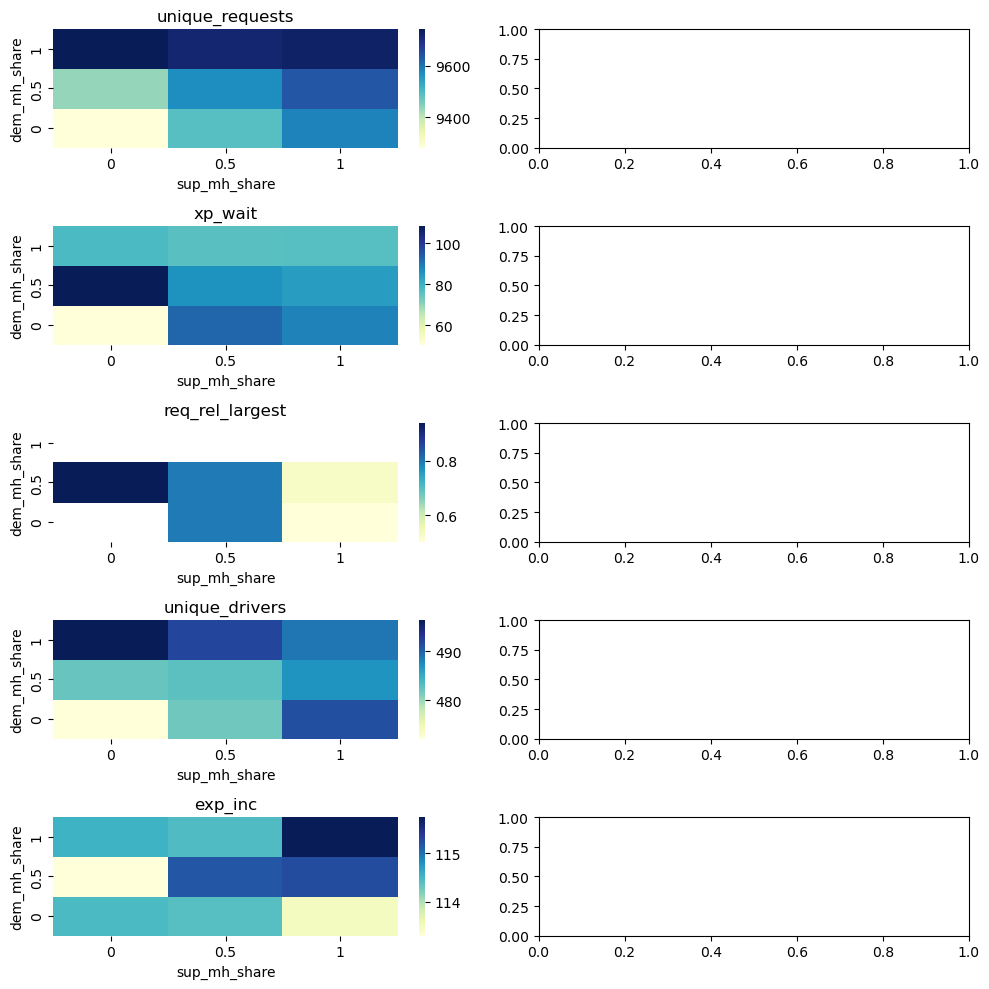

In [38]:
select_dem_cols = ['unique_requests', 'xp_wait','req_rel_largest']
select_sup_cols = ['unique_drivers', 'exp_inc']

select_df = pd.concat([df_dem[['dem_mh_share','sup_mh_share']], df_dem[select_dem_cols], df_sup[select_sup_cols]], axis=1)

fig, axes = plt.subplots(5, 2, figsize=(10, 10))

for i, column in enumerate(select_dem_cols + select_sup_cols):
    pivot_df = select_df.pivot(index='dem_mh_share', columns='sup_mh_share', values=column)
    sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[i,0])  # Adjust cmap as needed
    axes[i, 0].set_title(column)  # Set the title for each subplot
    axes[i, 0].invert_yaxis()

plt.tight_layout()  # Adjust layout
plt.show()

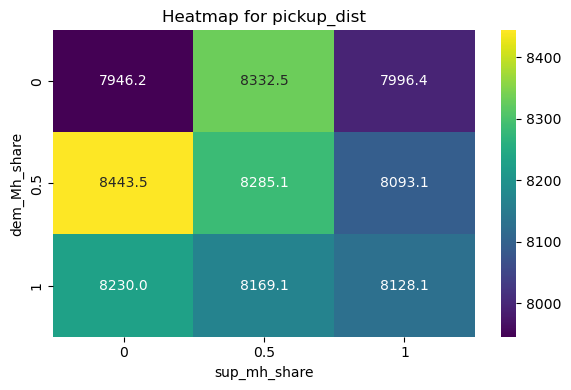

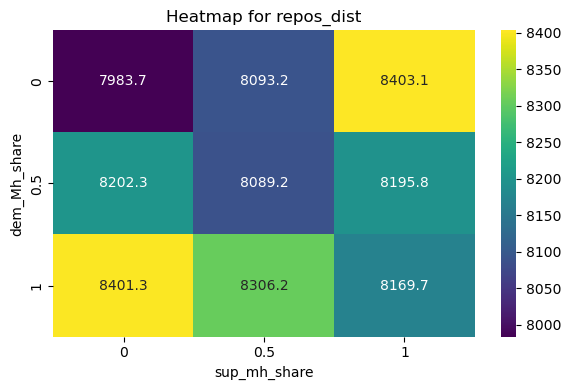

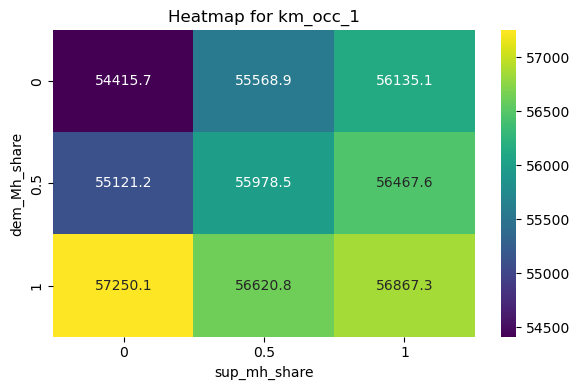

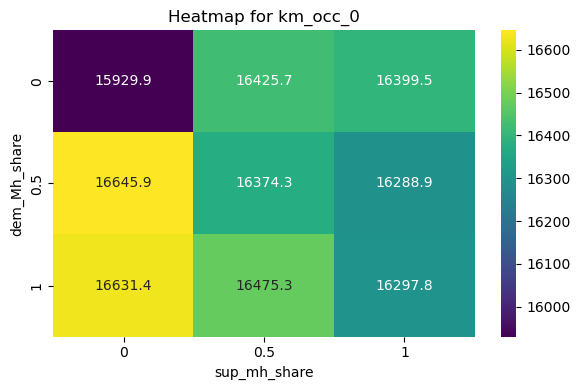

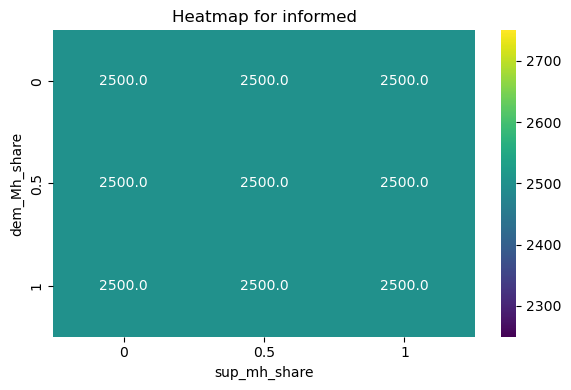

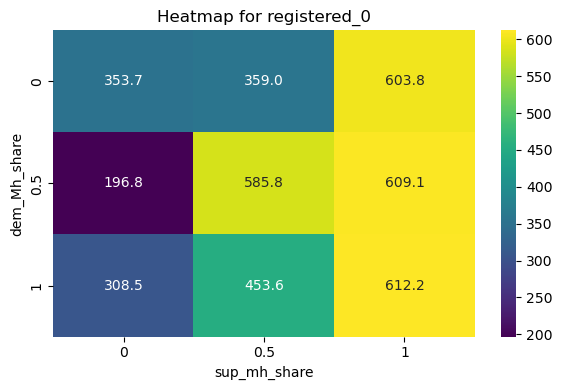

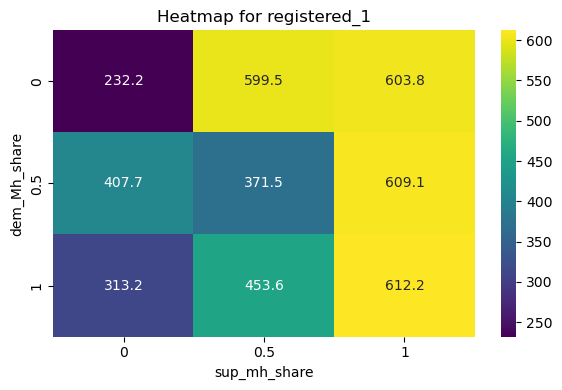

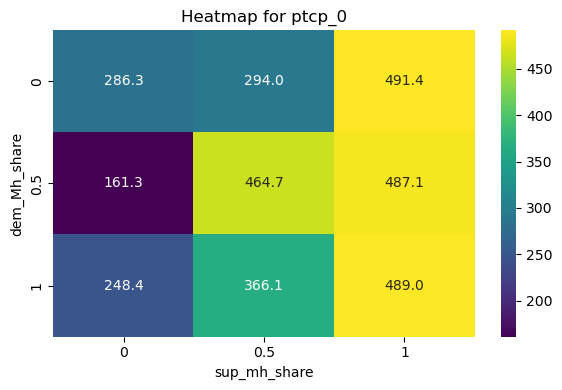

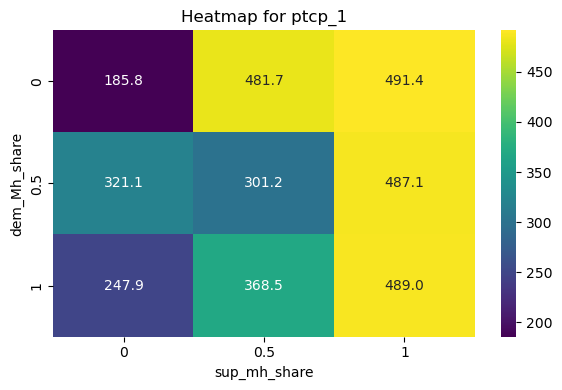

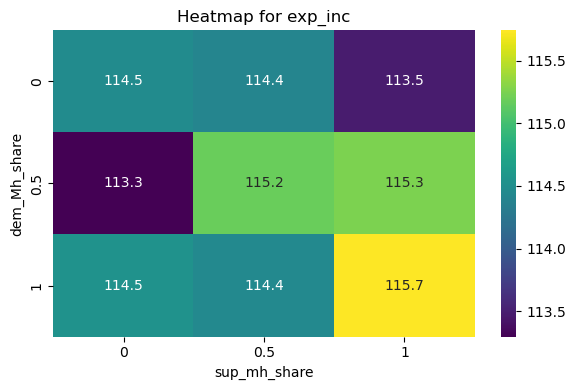

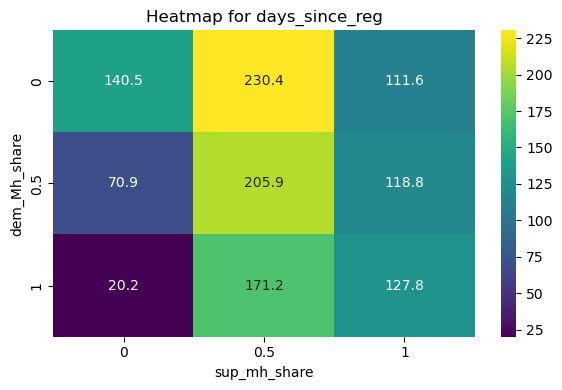

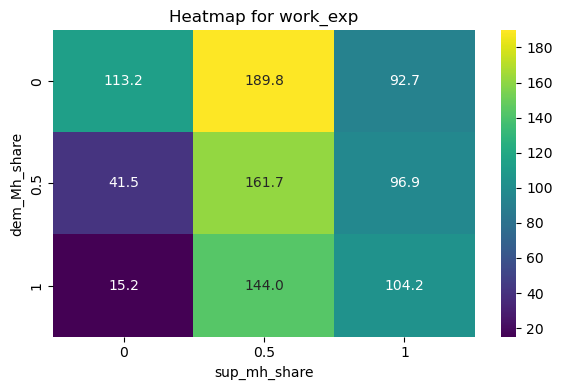

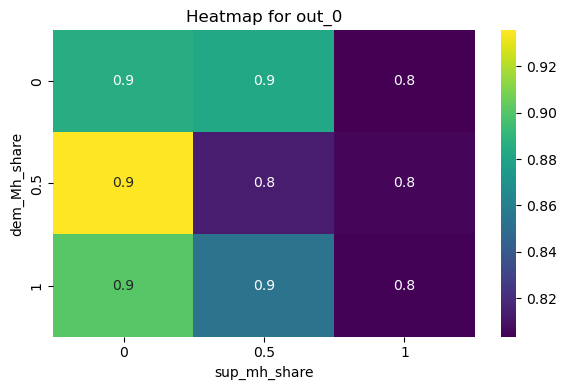

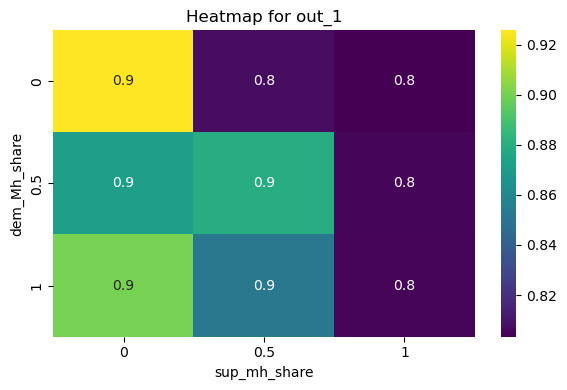

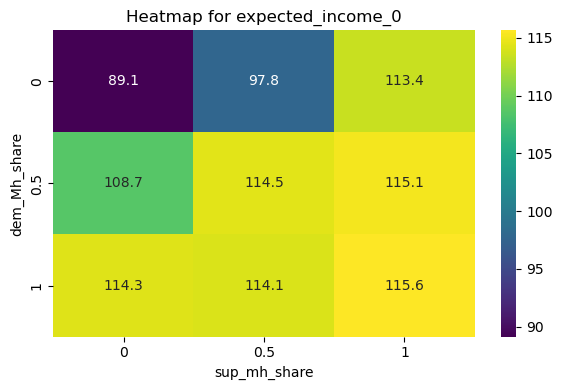

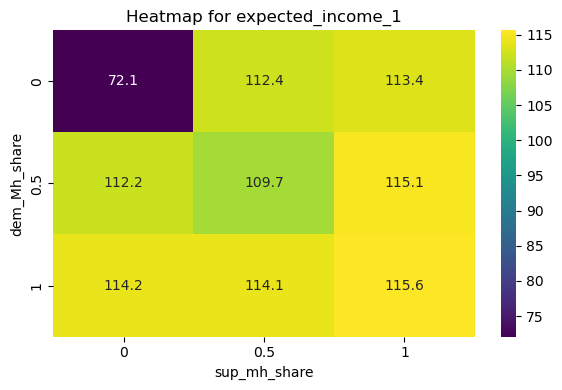

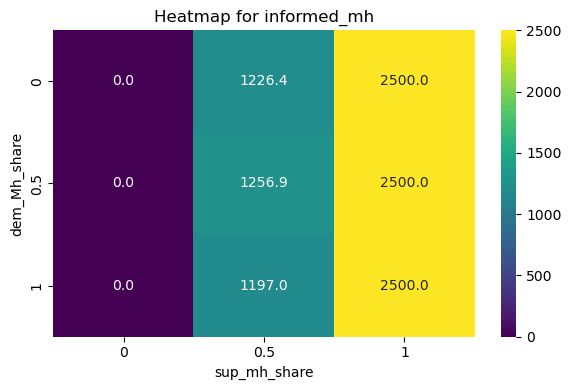

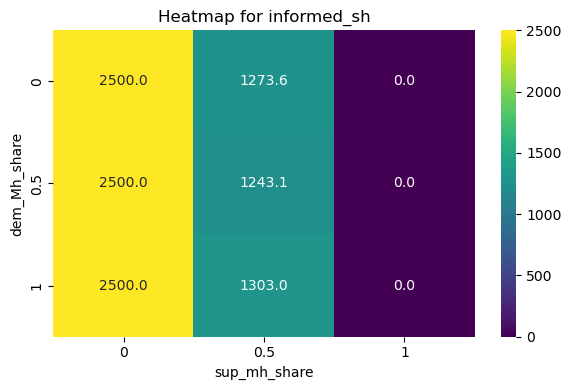

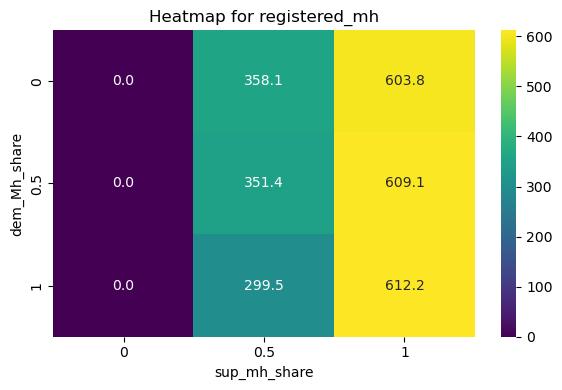

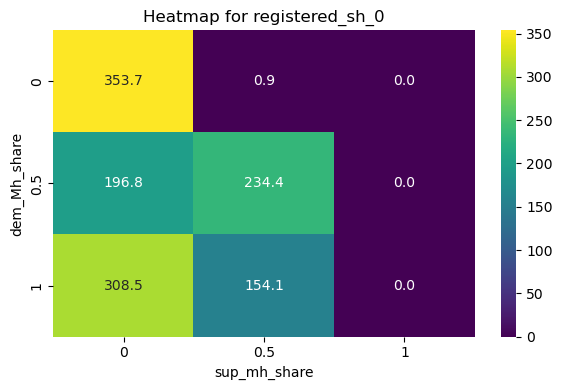

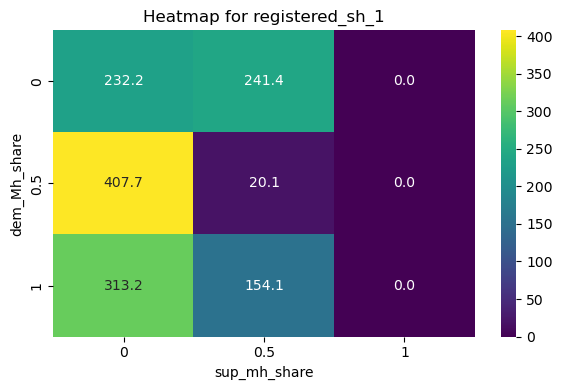

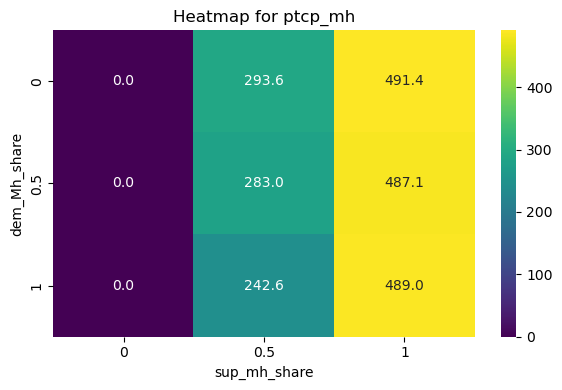

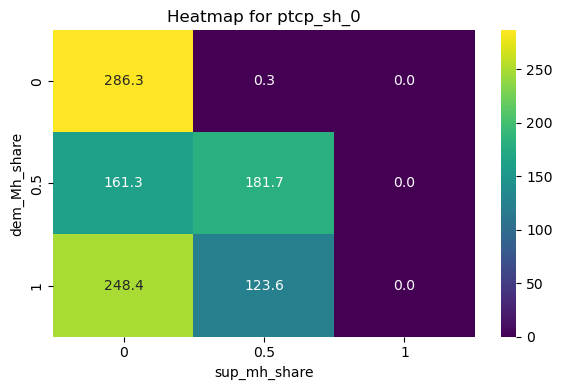

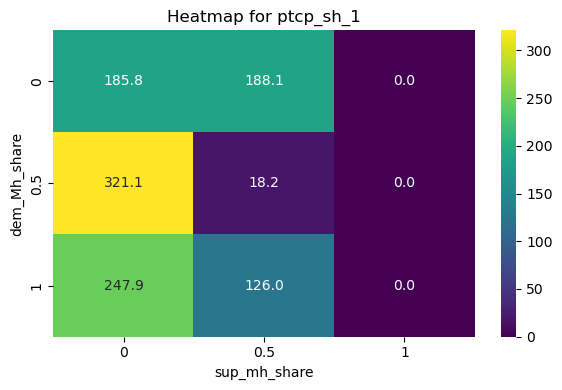

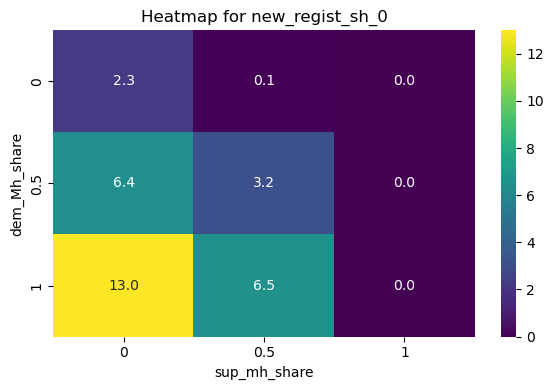

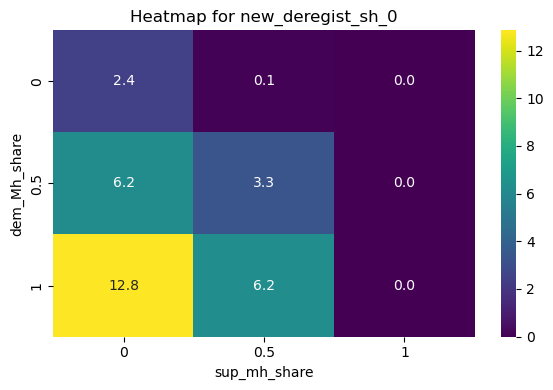

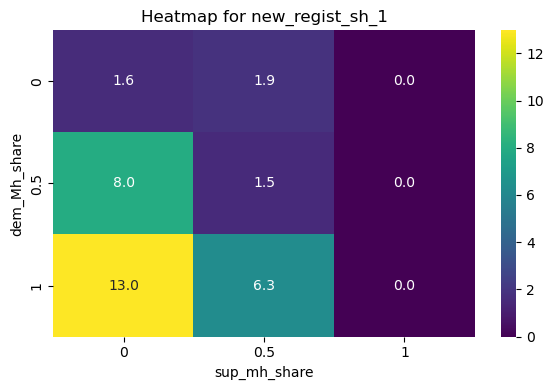

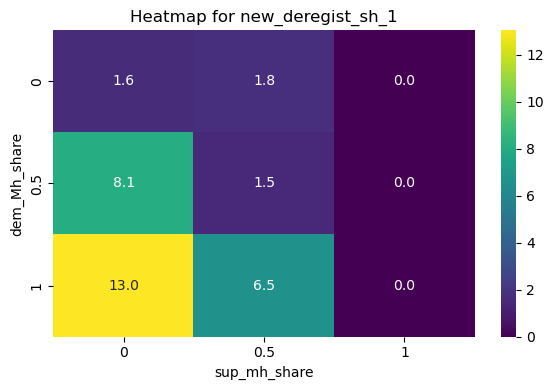

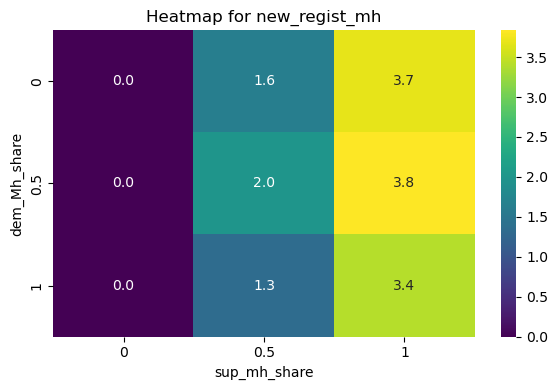

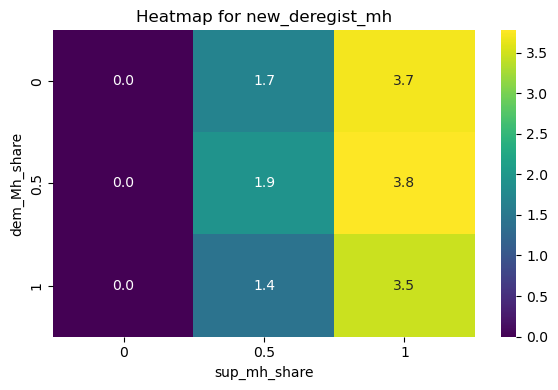

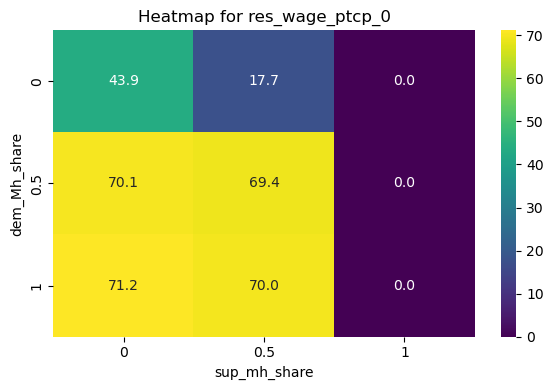

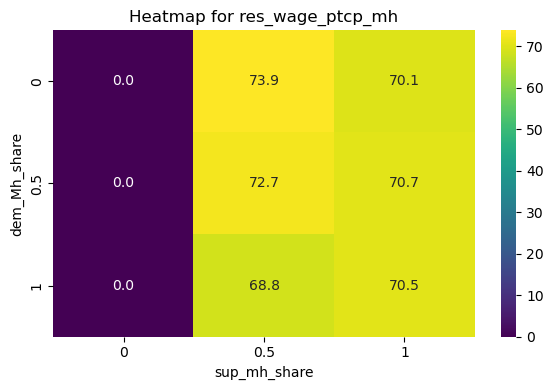

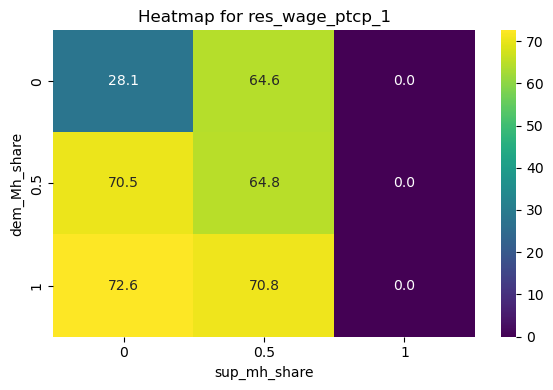

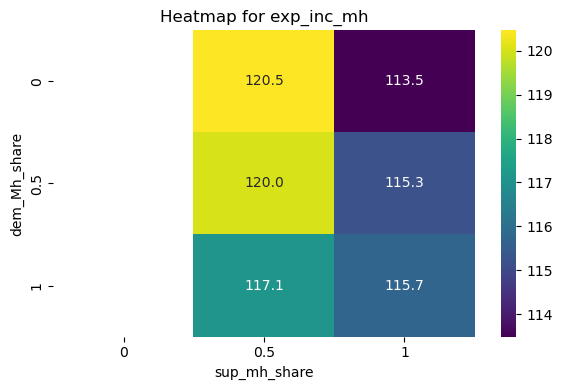

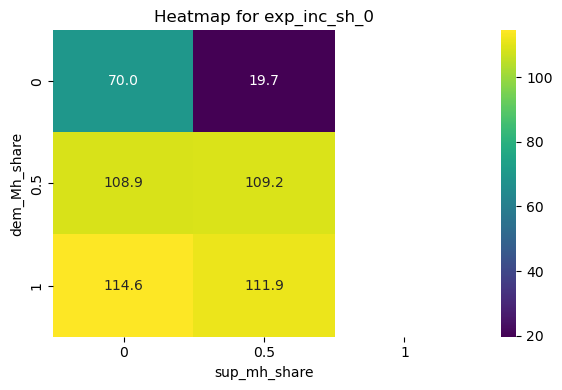

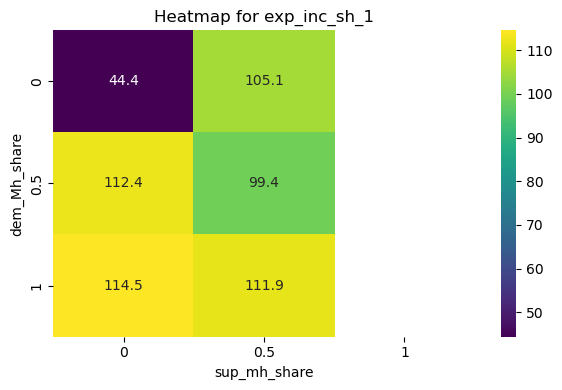

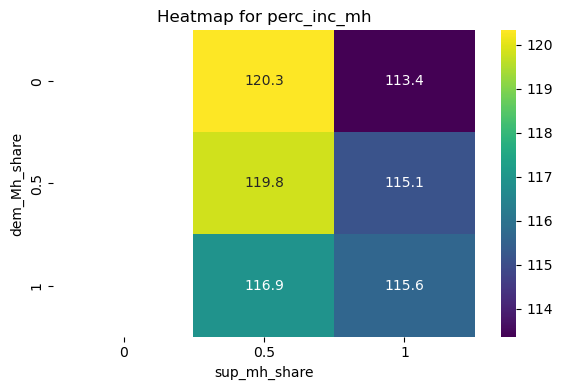

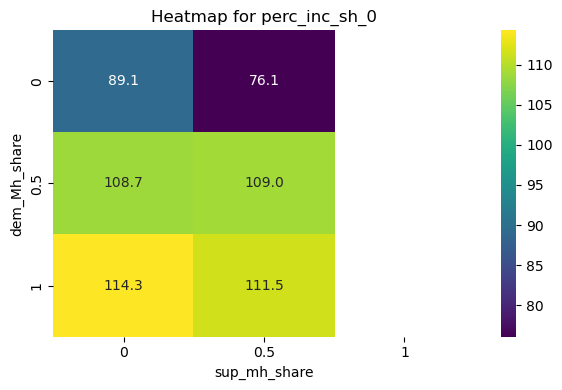

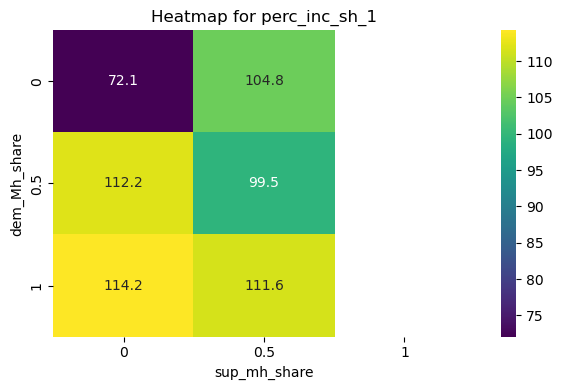

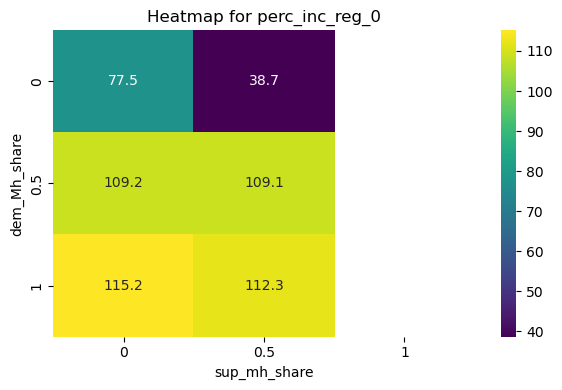

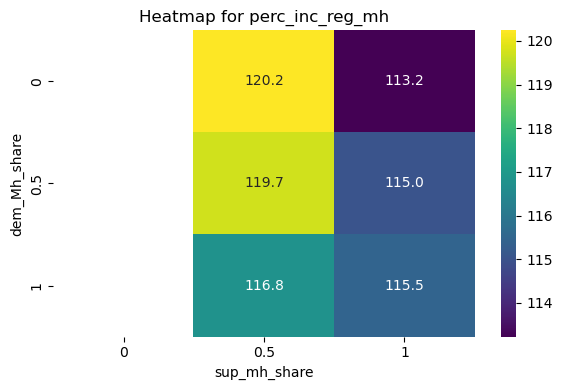

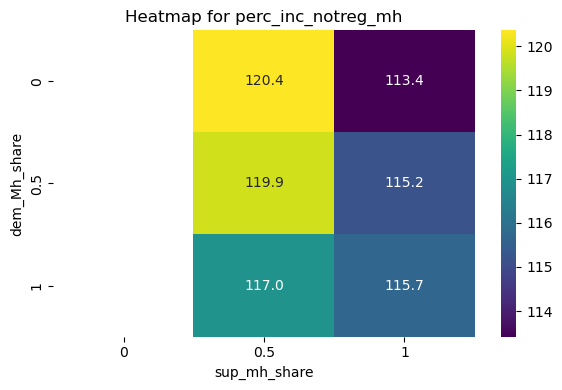

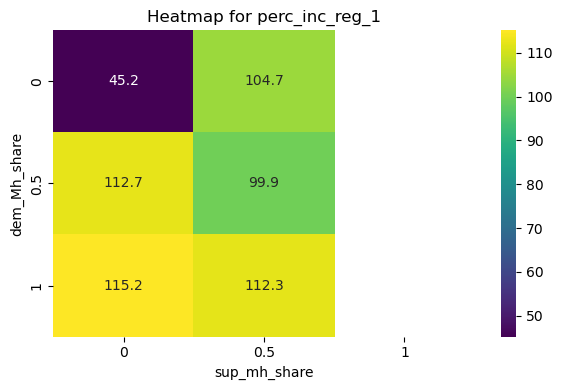

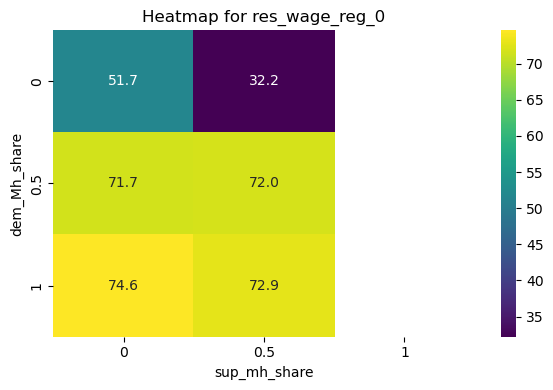

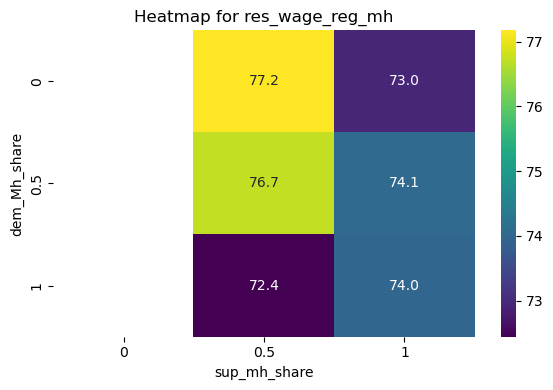

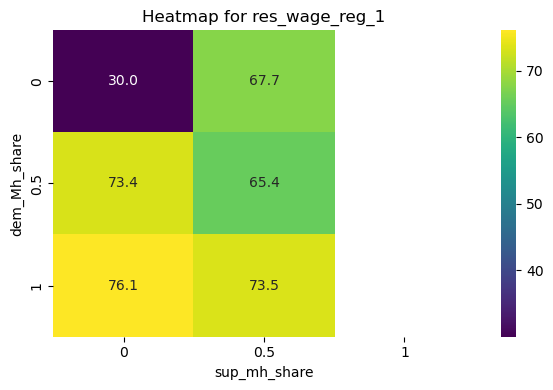

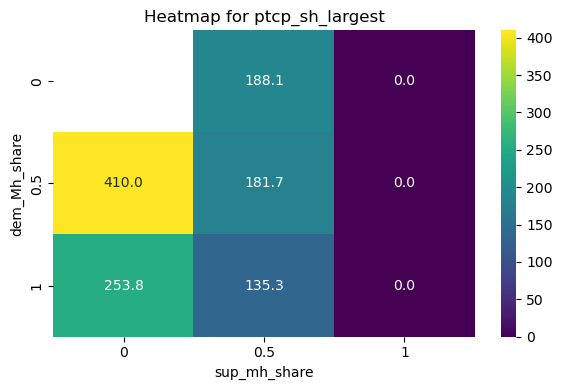

In [32]:

# Loop through columns and create heatmaps
for col in filtered_columns_sup:
    pivot_df = df_sup.pivot(index='dem_mh_share', columns='sup_mh_share', values=col)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
    plt.title(f'Heatmap for {col}')
    plt.xlabel('sup_mh_share')
    plt.ylabel('dem_Mh_share')
    plt.tight_layout()
    plt.show()

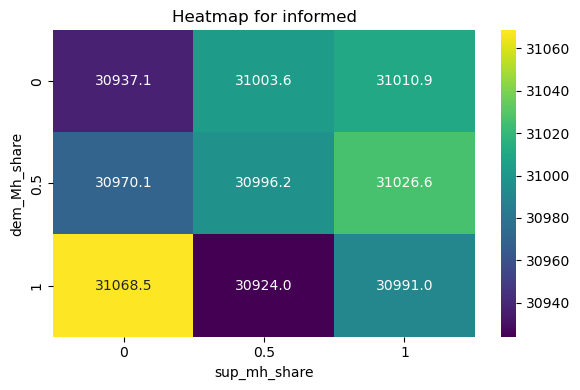

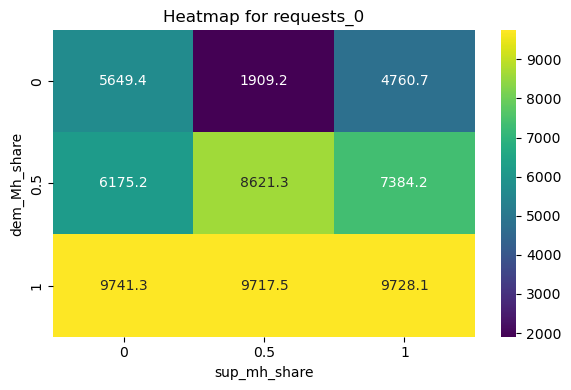

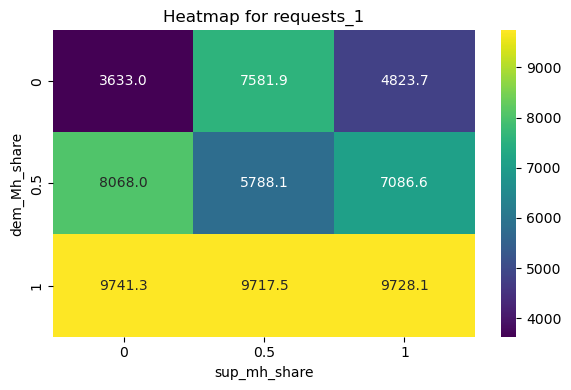

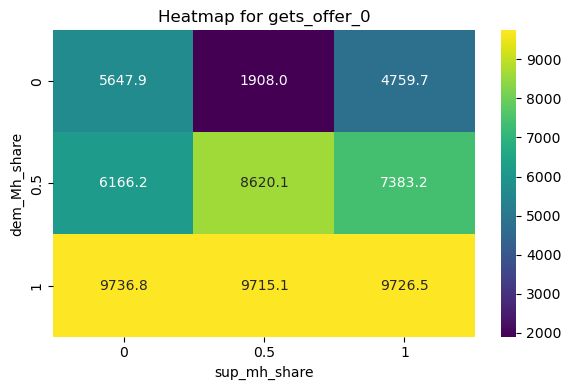

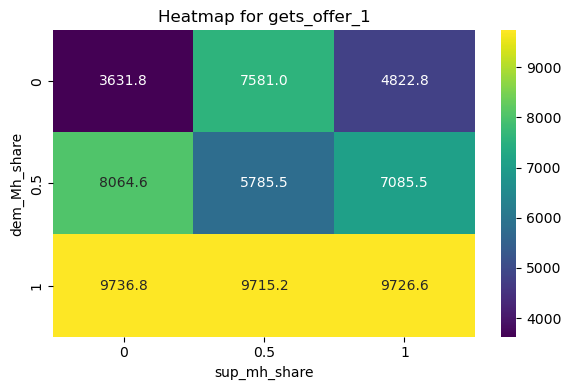

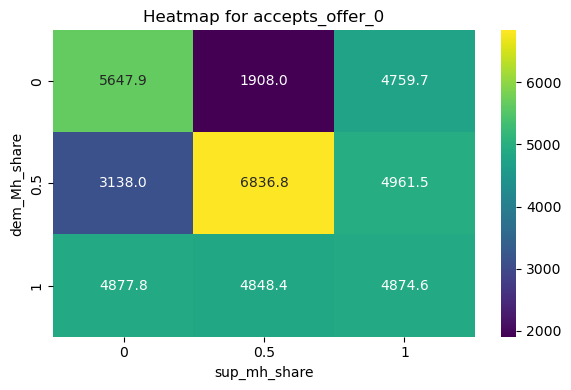

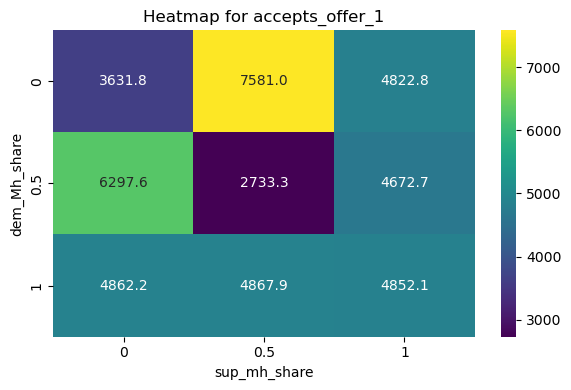

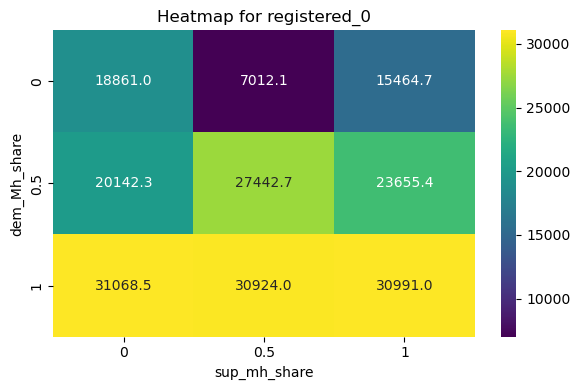

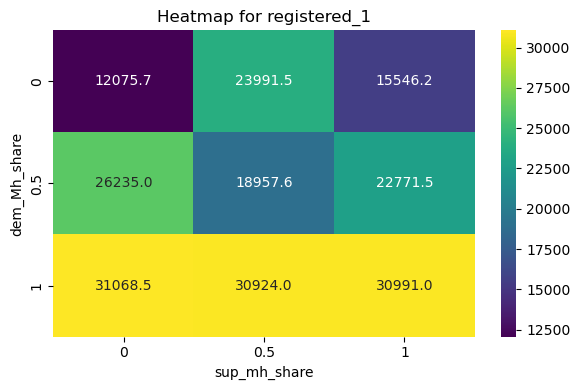

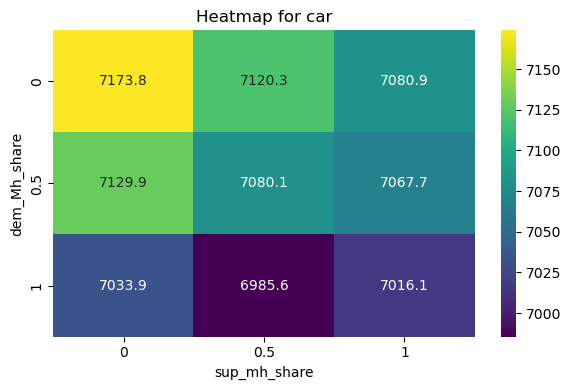

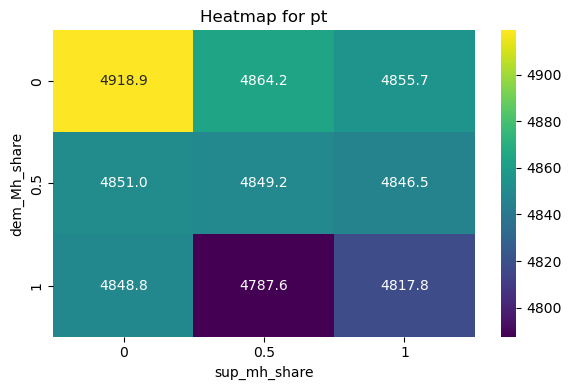

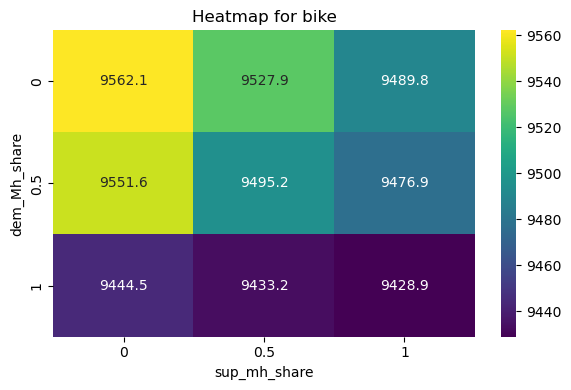

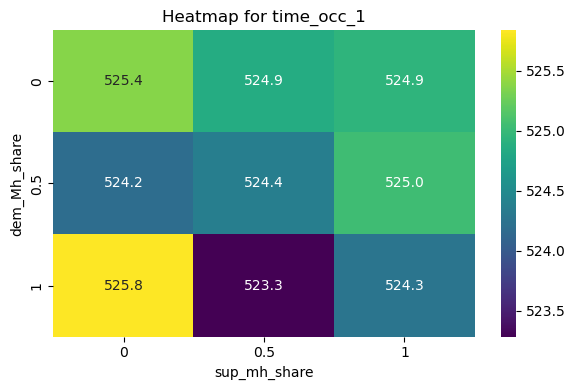

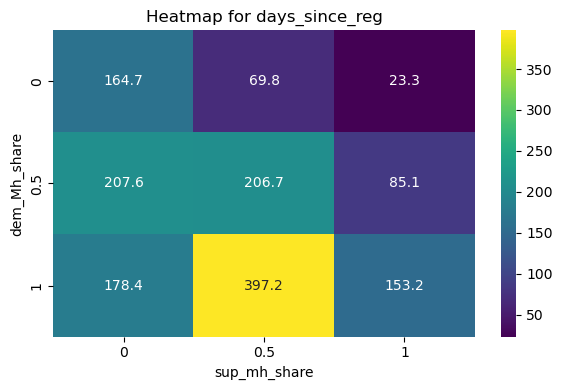

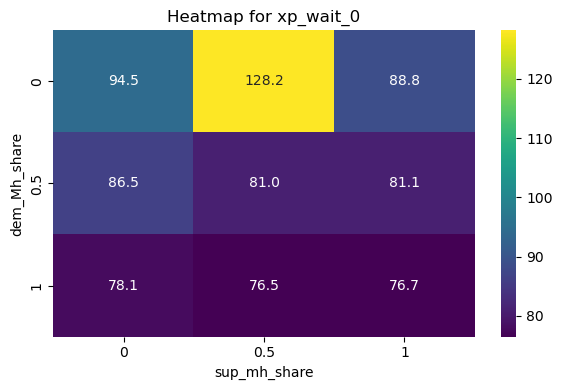

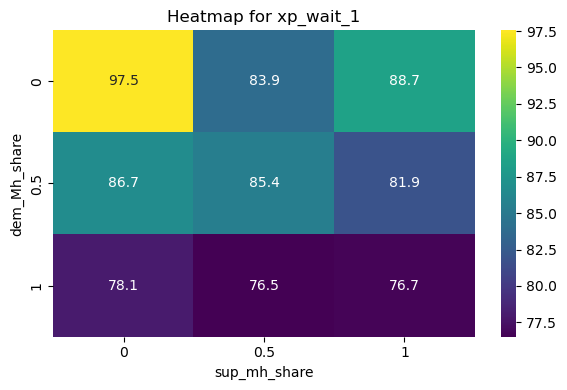

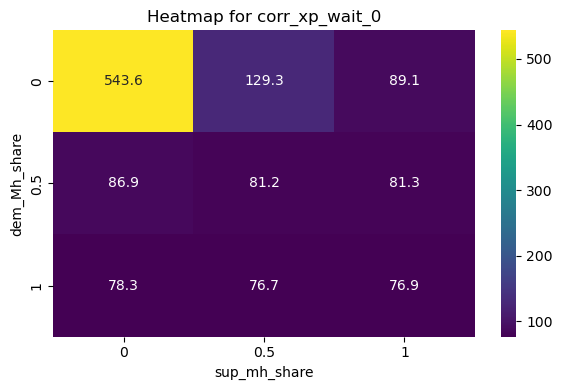

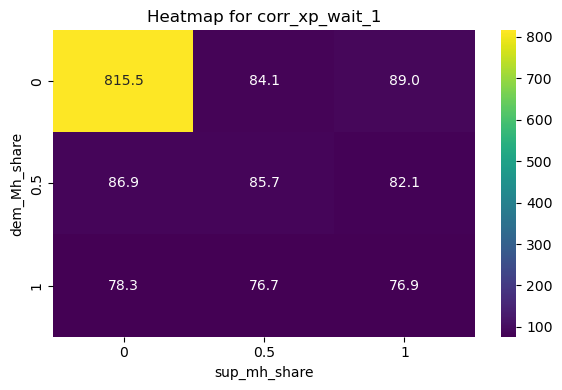

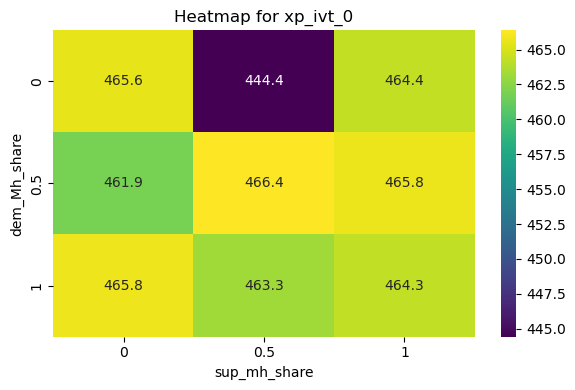

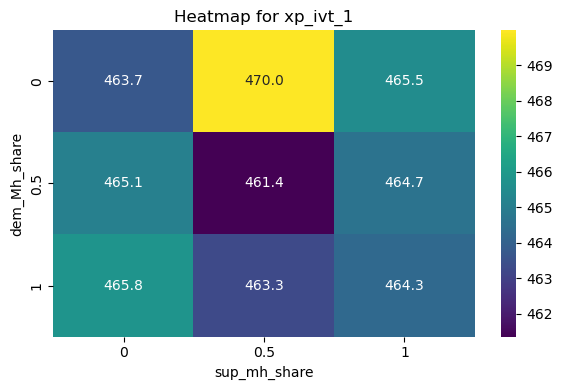

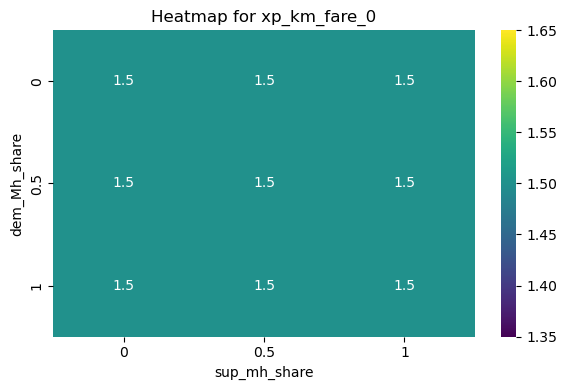

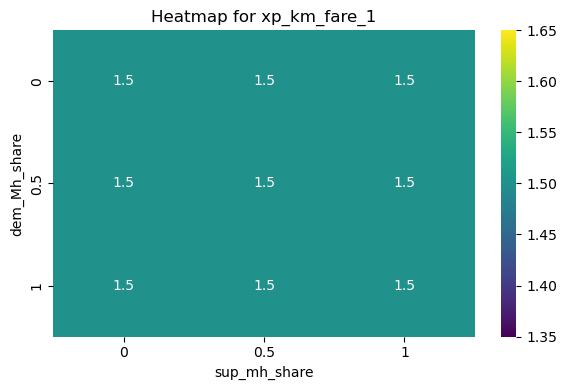

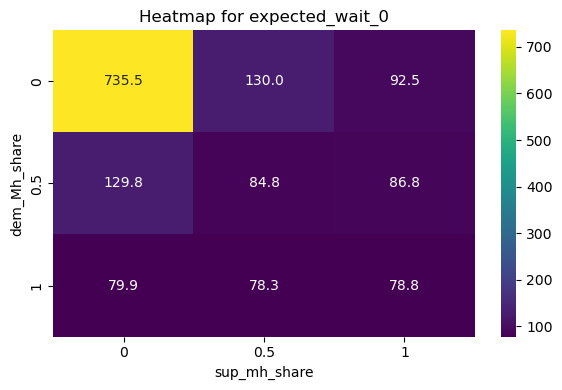

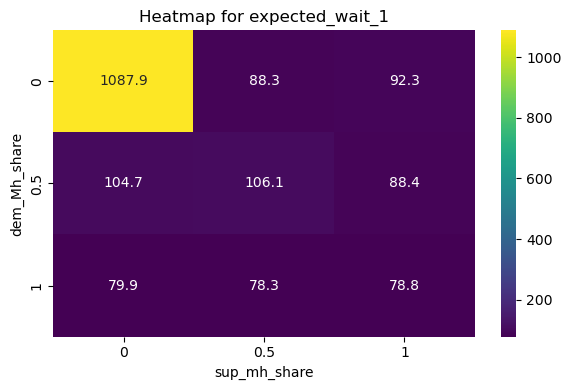

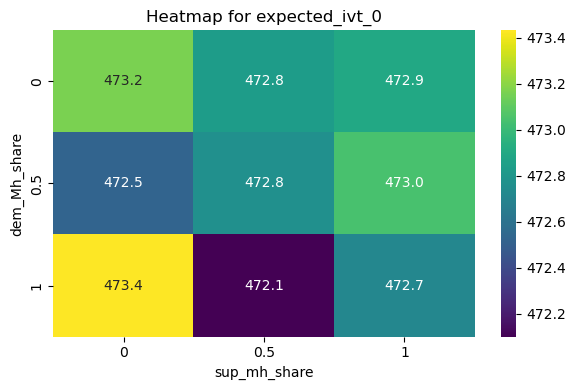

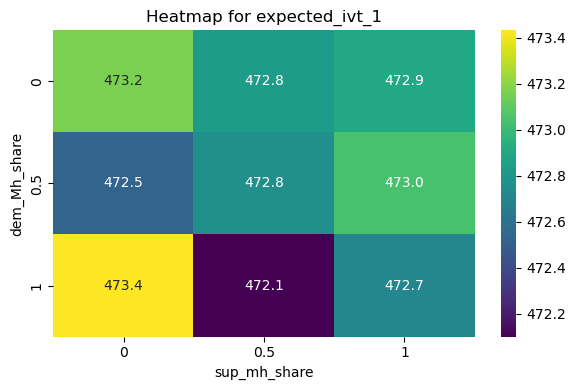

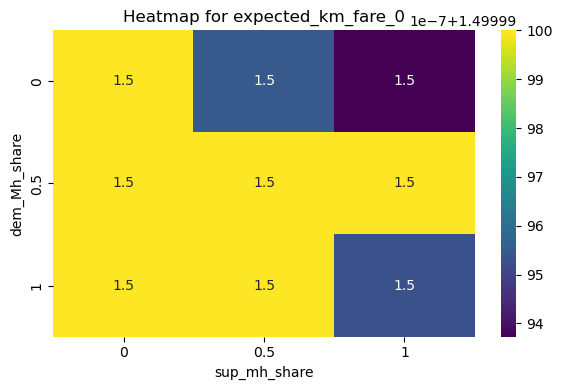

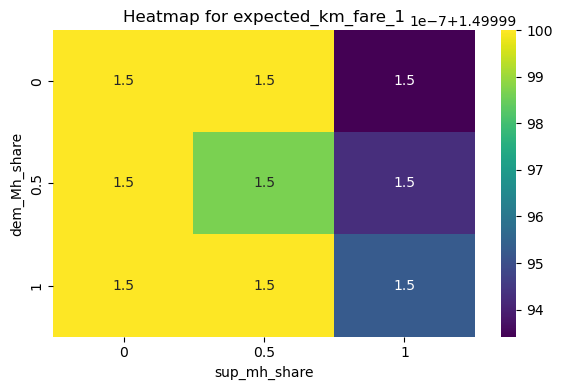

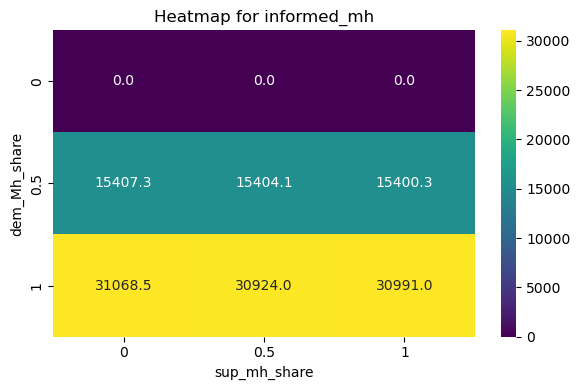

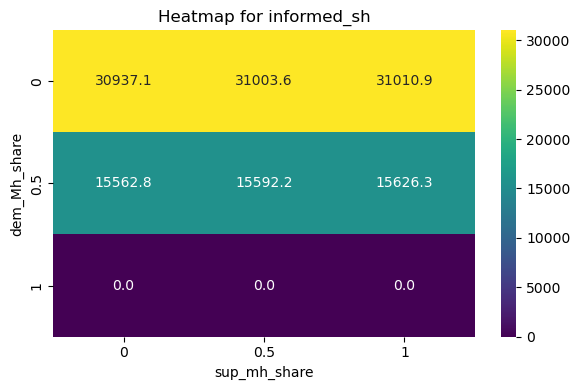

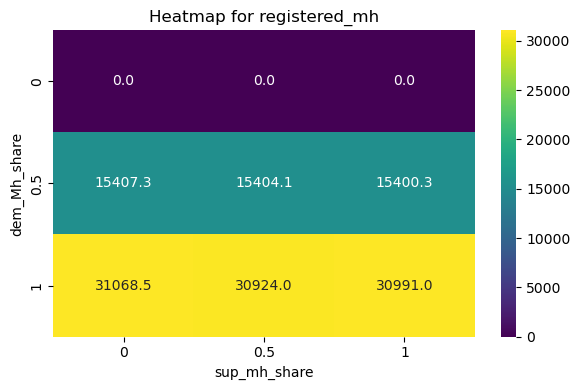

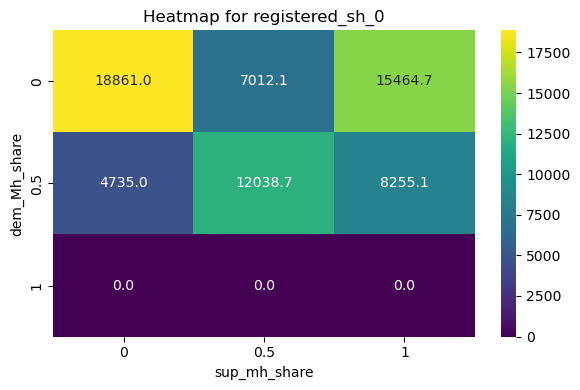

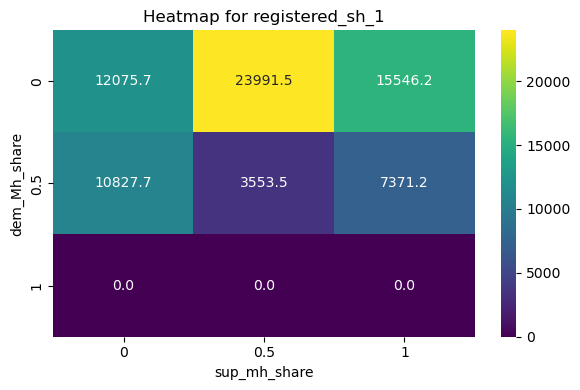

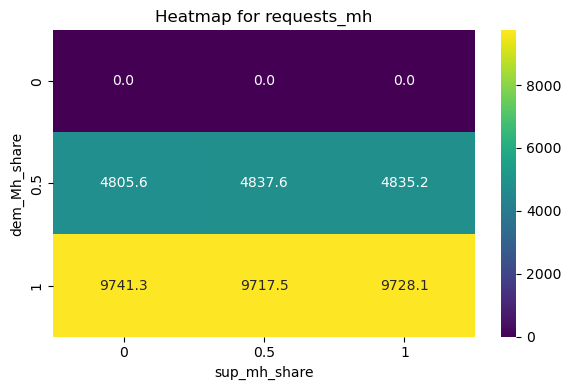

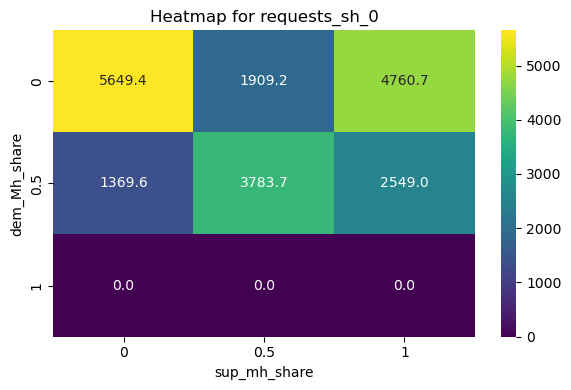

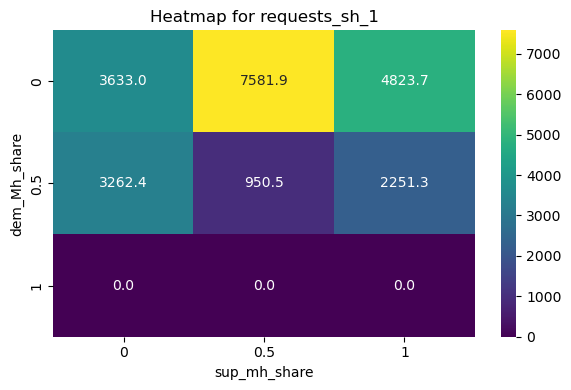

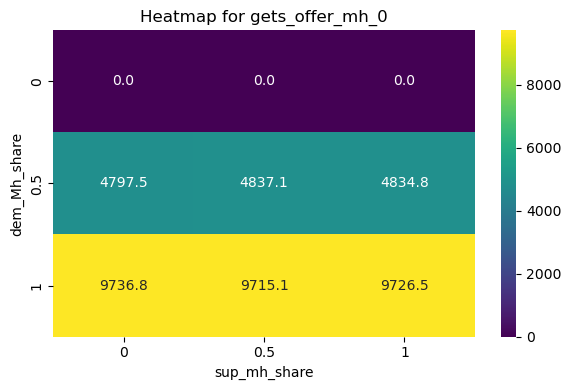

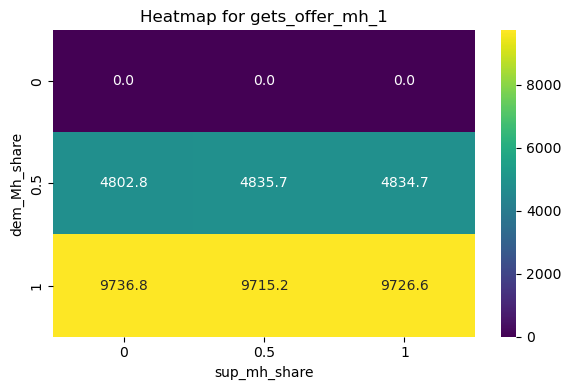

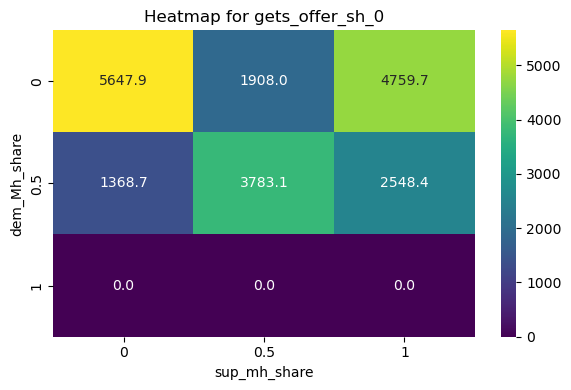

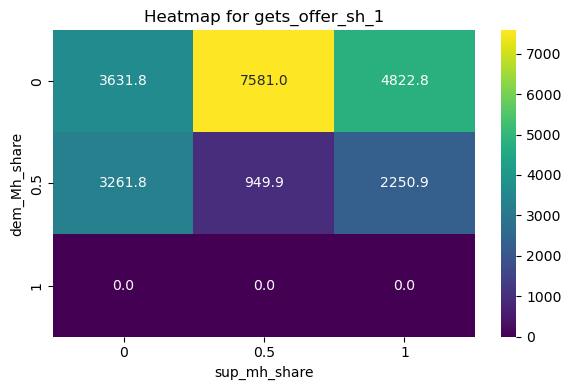

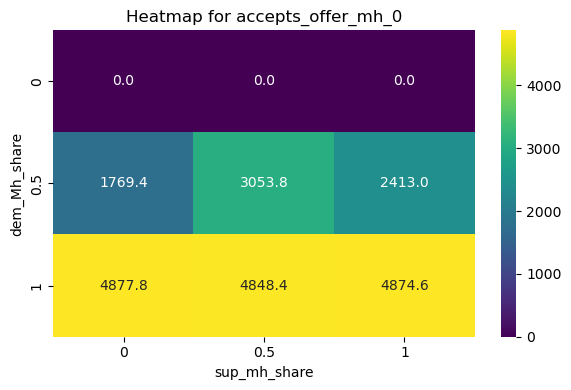

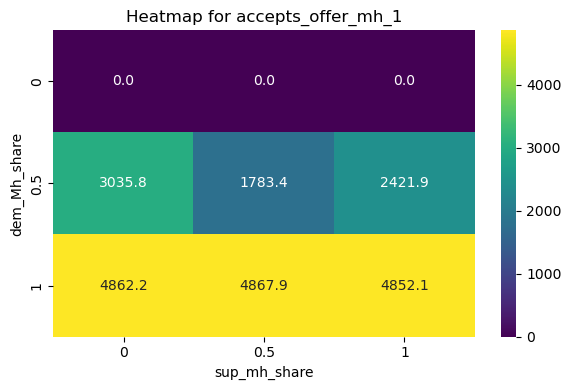

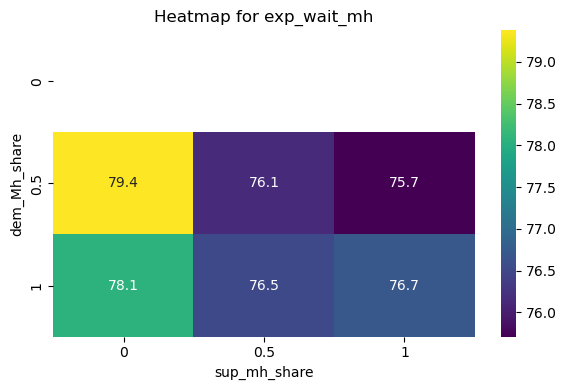

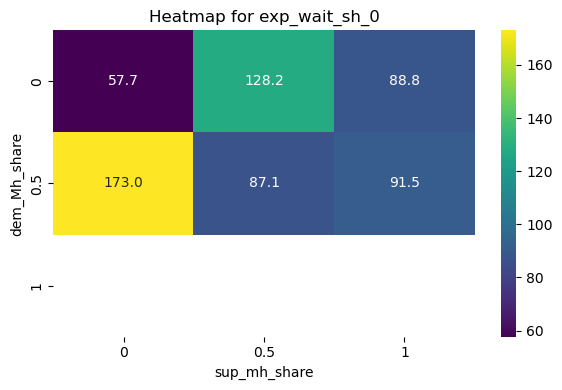

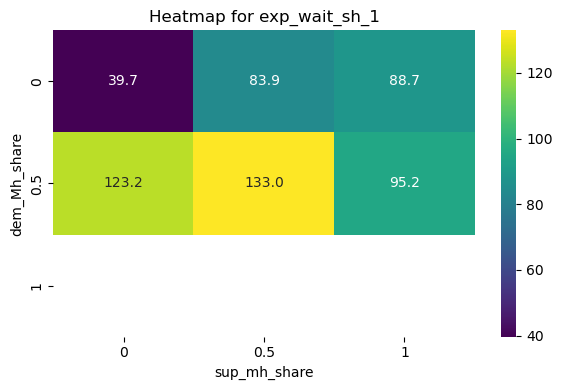

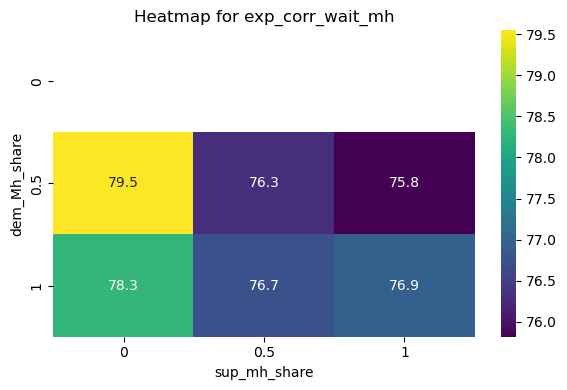

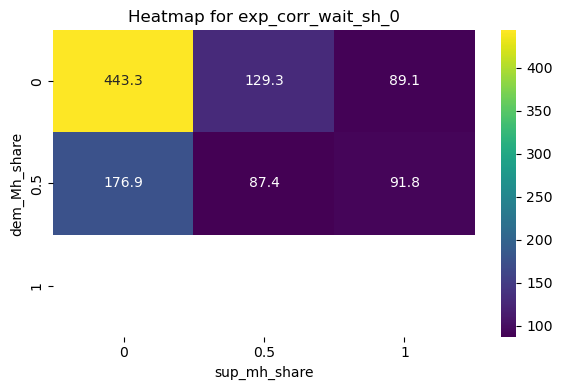

c:\Users\ge27fus\.conda\envs\fleetmaas_eval\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\ge27fus\.conda\envs\fleetmaas_eval\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


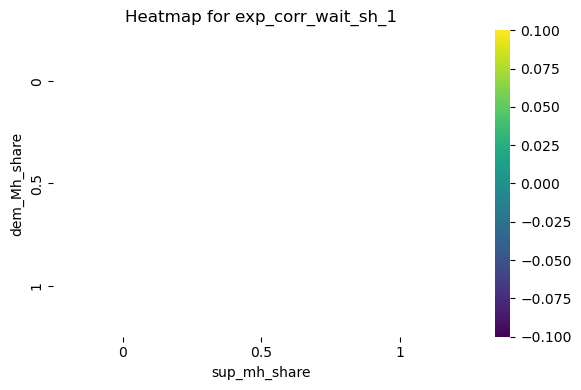

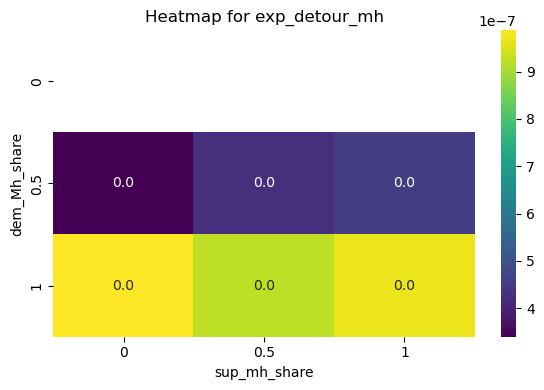

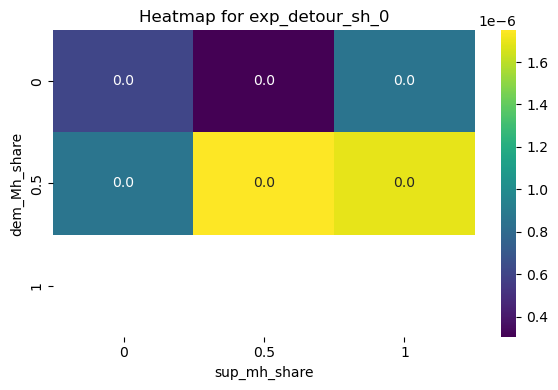

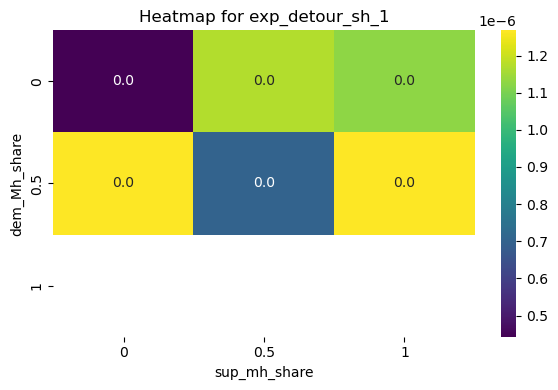

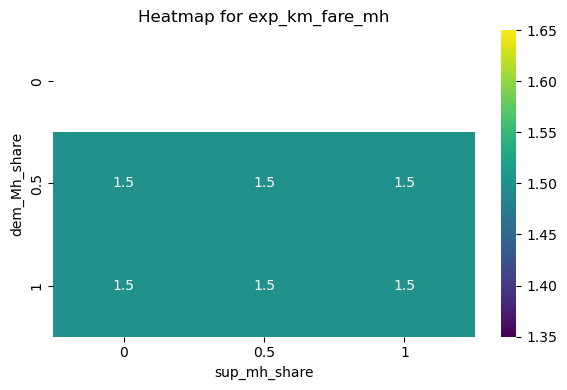

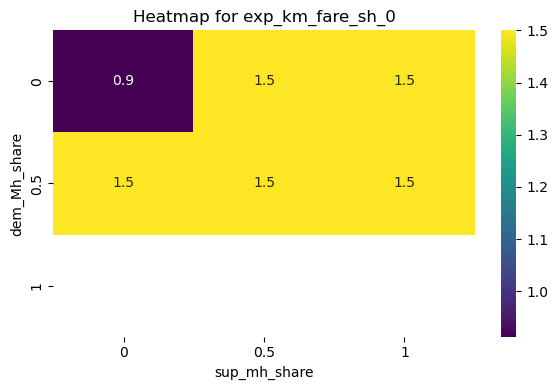

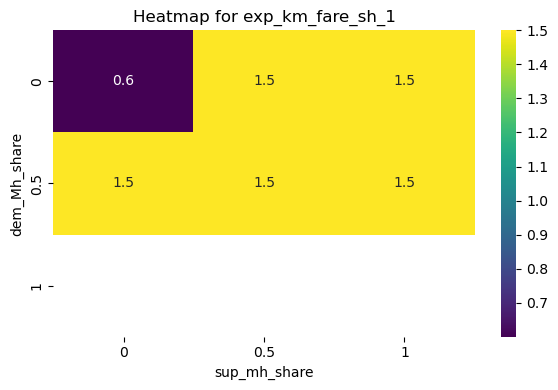

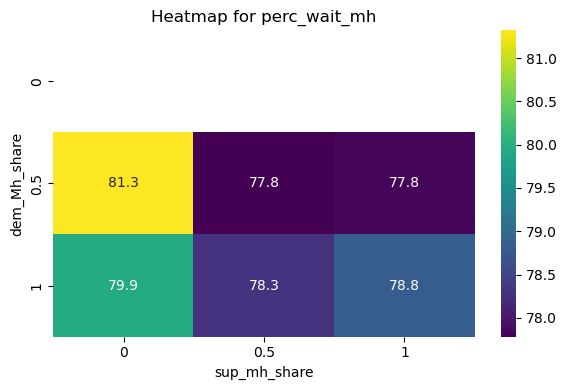

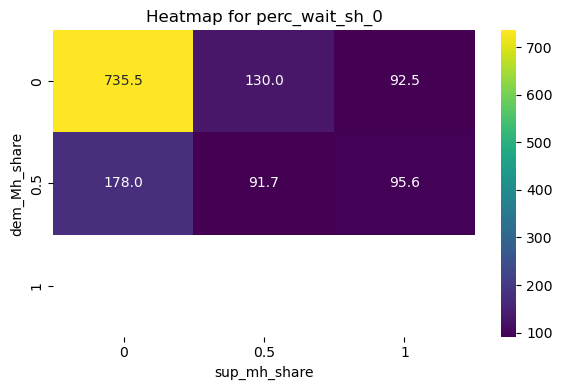

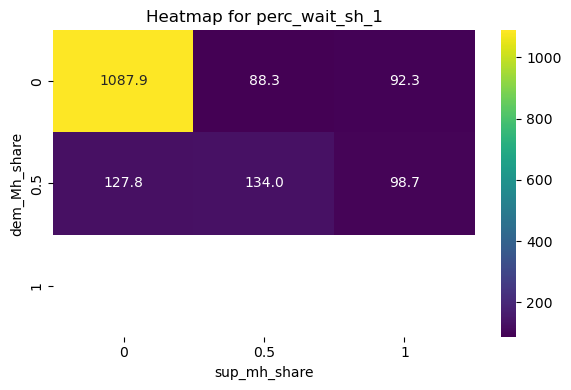

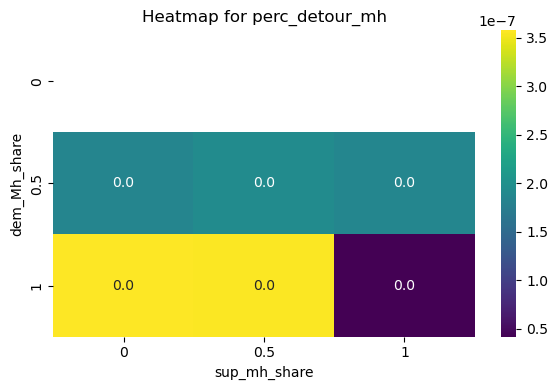

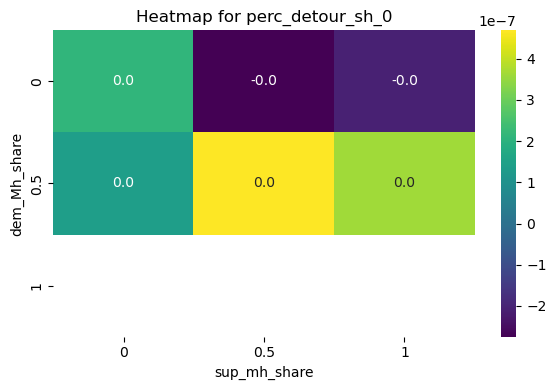

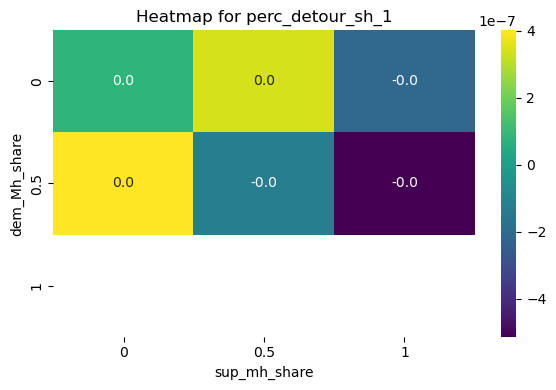

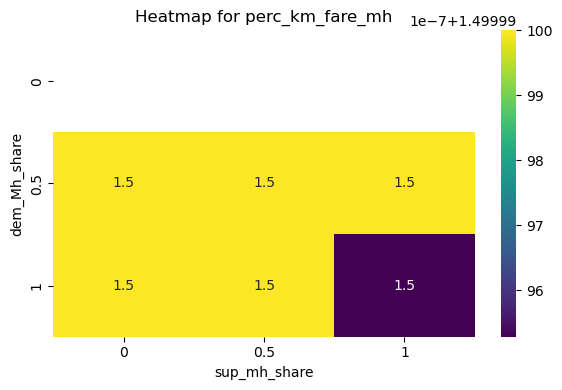

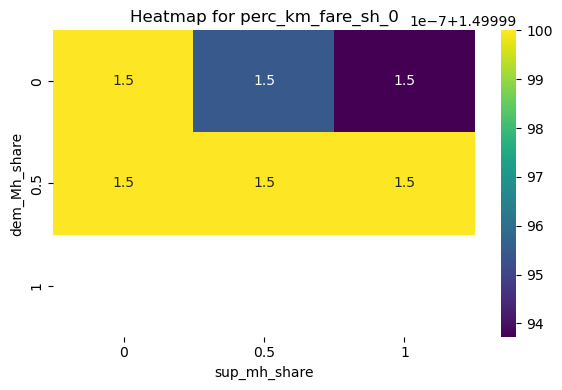

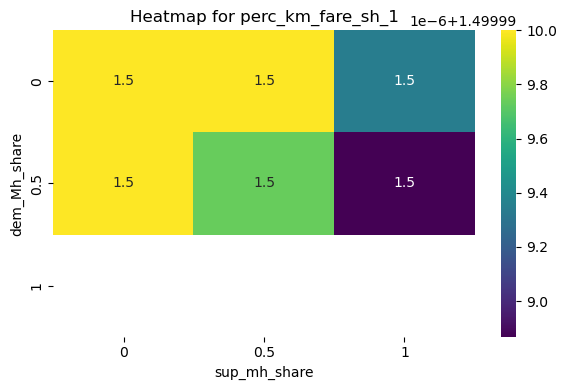

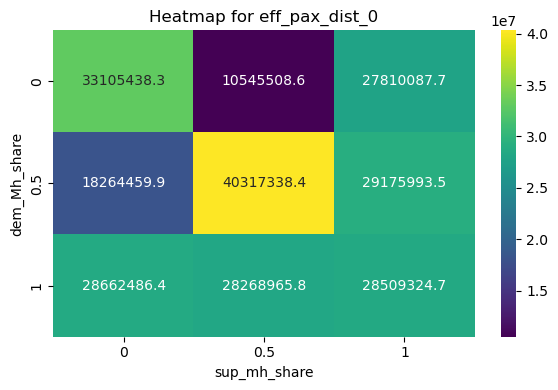

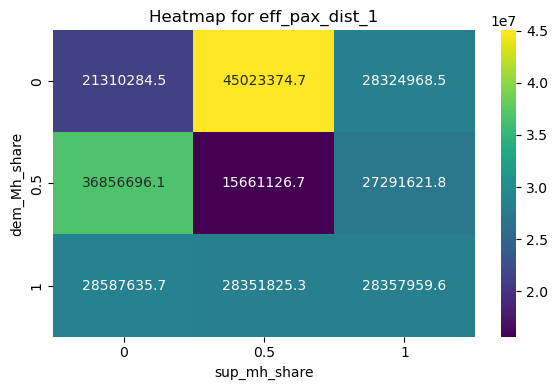

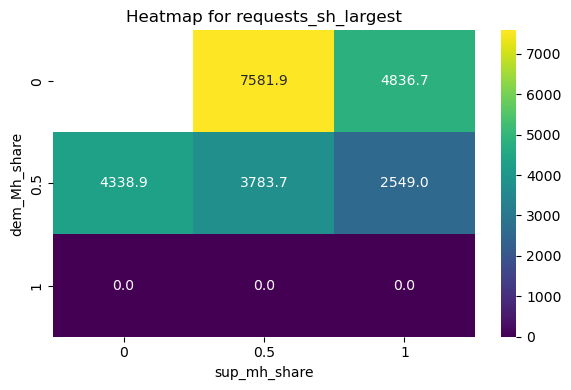

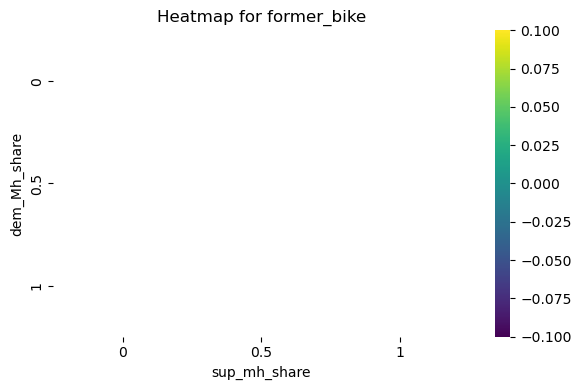

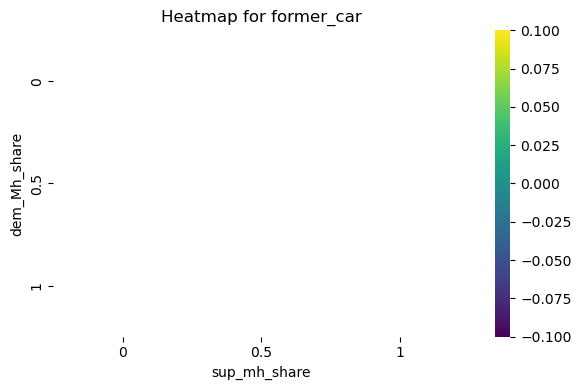

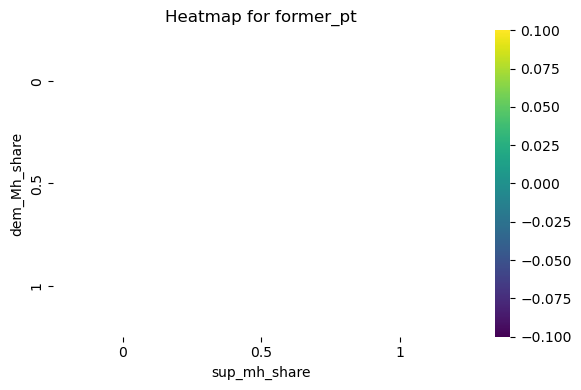

In [33]:
for col in filtered_columns_dem:
    pivot_df = df_dem.pivot(index='dem_mh_share', columns='sup_mh_share', values=col)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
    plt.title(f'Heatmap for {col}')
    plt.xlabel('sup_mh_share')
    plt.ylabel('dem_Mh_share')
    plt.tight_layout()
    plt.show()

In [34]:
aggr_dem.xs(('0','1','ss')).keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'gets_offer_mh_0', 'gets_offer_mh_1',
       'gets_offer_sh_0', 'gets_offer_sh_1', 'accepts_offer_mh_0',
       'accepts_offer_mh_1', 'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1',
       'exp_detour_mh', 'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_far